In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.stats.multitest as sm
import sklearn
import scipy.stats
from scipy import stats
import scipy.stats
import plotly.express as px

In [2]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
# final meta_data
# with no uniprot
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')
df

,Protein,Uniprot_id,Concatenation,Pfam_ID,Start_End_domain,EBD_domain,Bind_pathogen_elm,Bind_human_elm,Hvidb_Experimentally_verified_complex_structures,Hvidb_Human_virus_PPI_data,...,Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,Viral_non_EBD_interactions,Protein_with_EBD_and_non_EBD_domain,Average_rate,Protein_interactions_by_domain_motif,Multi_virus_EBD_domain_motif,Percentage_expressed_tissues,Percentage_TPM_tissues,Gene_essentially,orthologs_ensembl_78
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000167359,ENSP00000369559,Q9H343,0,PF13853,33-312,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.002326,0,0
ENSG00000176302,ENSP00000314806,Q6PIV2,0,PF00250,172-262,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.081395,0,1
ENSG00000138768,ENSP00000264904,O60763,1,PF04869;PF04871;PF18770,344-628;784-954;269-329,0,0,0,0,1,...,0,1,0,0.734774,NaN,0.0,NaN,44.465116,0,1
ENSG00000281935,ENSP00000488646,A0A0J9YY17,0,PF12780;PF12774;PF03028;PF12775;PF12781;PF1819...,1498-1757;519-845;2598-2711;1141-1322;2131-235...,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000280529,ENSP00000487182,A0A0G2JRY5,0,PF05236;PF07531,206-454;1-55,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000276253,ENSP00000481534,A0A0G2JNJ9,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000288623,ENSP00000502390,A0A6Q8PGS0,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000284526,ENSP00000491046,A0A1W2PNU3,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,5.516279,0,0


# AVG rate

<Figure size 432x288 with 0 Axes>

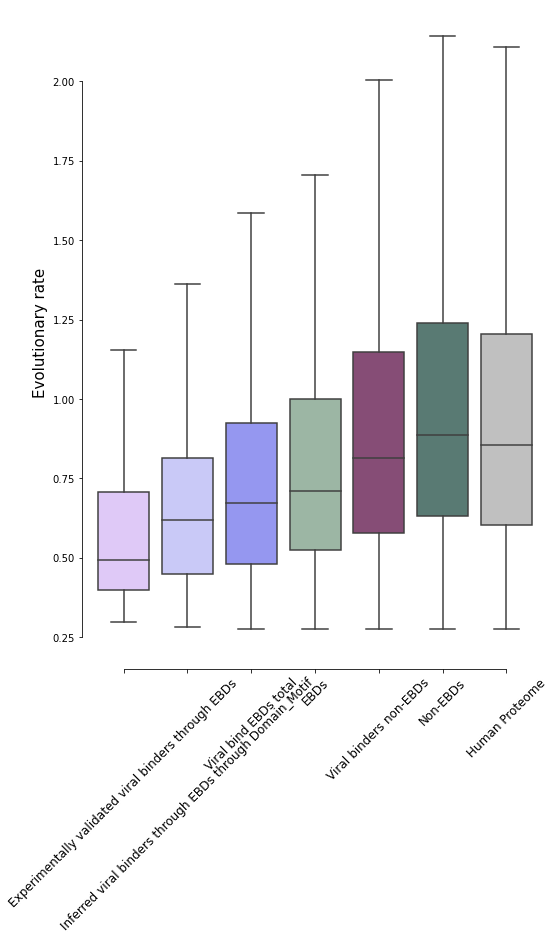

In [7]:
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[(df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1) & (df['Concatenation']==1)]['Average_rate'].to_frame()
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb= df[(df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1) & (df['Concatenation']==1)]['Average_rate'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1) & (df['Concatenation']==1)]['Average_rate'].to_frame()
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Viral_non_EBD_interactions = df[(df['Viral_non_EBD_interactions']==1) & (df['Concatenation']==1)]['Average_rate'].to_frame()
Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'
EBD_domain = df[(df['EBD_domain']==1) & (df['Concatenation']==1)]['Average_rate'].to_frame()
EBD_domain['type'] = 'EBD_domain'
non_EBD_domain = df[(df['EBD_domain']==0) & (df['Concatenation']==1)]['Average_rate'].to_frame()
non_EBD_domain['type'] = 'Non_EBD_domain'
proteome_concatenation =  df[df['Concatenation']==1]['Average_rate'].to_frame()
proteome_concatenation['type'] = 'Proteome_concatenation'

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['Concatenation']==1))]['Average_rate'].to_frame() 
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'


# union all #

df_merege = Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb.append([Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,
                                                                              bind_virus_elm_hvidb_only_EBD,
                                                                              EBD_domain,
                                                                             Viral_non_EBD_interactions,
                                                                             non_EBD_domain,
                                                                             proteome_concatenation],ignore_index=True)
df_merege['type'].unique()
sns.despine(offset=10, trim=True)
f = plt.figure(figsize=[8,12])
list_colors = [
    '#dfc1ff','#C1C2FF','#8688ff',
               '#98baa2',
               '#8f447a',
               '#547f76',
               '#C0C0C0']
ax = sns.boxplot(x="type", y="Average_rate",data=df_merege,showfliers = False,palette=list_colors)

#ax.set(ylim=(0,2))
plt.ylabel('Evolutionary rate', fontsize = 15)
plt.xlabel('')
sns.despine(offset=10,trim=True,fig=f,ax=ax)

ax.set_xticklabels(['Experimentally validated viral binders through EBDs',
     'Inferred viral binders through EBDs through Domain_Motif','Viral bind EBDs total',
       'EBDs','Viral binders non-EBDs', 'Non-EBDs',
       'Human Proteome'],rotation = 45, size =12)
ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\Avg_rate.pdf',transparent=True)

In [8]:
list_name = ['Viral_binding_EBD_experimental_pdb_Domain_Motif',
       'Viral_binding_EBD_Inferred_Domain_Motif','bind_virus_elm_hvidb_only_EBD',
       'EBD_domain',
       'Viral_non_EBD_interactions', 'Non_EBD_domain']

list_name_2 = ['Proteome_concatenation']

set_match = set()
for line in list_name:
    for row in list_name_2:
        if line != row:
            res = line+','+row
            check = row+','+line
            if check not in set_match:
                set_match.add(res)
set_match.add('Viral_binding_EBD_Inferred_Domain_Motif,Viral_non_EBD_interactions')
set_match = [line.split(',') for line in set_match]

list_pvalue = []
for line in set_match:
    x = df_merege[df_merege['type'] == line[0]]['Average_rate']
    y = df_merege[df_merege['type'] == line[1]]['Average_rate']
    mannwhitneyu = scipy.stats.mannwhitneyu(x,y,use_continuity=True, alternative='two-sided')
    list_pvalue.append(line[0]+'\t\t'+line[1]+': '+str(mannwhitneyu[1]/2))

list_pvalue = [line.split(':') for line in list_pvalue]
list_pvalue_by_order = sorted(list_pvalue, key=lambda x: float(x[1]), reverse=False)



#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]
names

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

bind_virus_elm_hvidb_only_EBD		Proteome_concatenation 1.2438558110586195e-31
EBD_domain		Proteome_concatenation 1.869993142679427e-28
Viral_binding_EBD_Inferred_Domain_Motif		Proteome_concatenation 2.489851552935606e-18
Viral_binding_EBD_Inferred_Domain_Motif		Viral_non_EBD_interactions 5.359816602354411e-14
Viral_binding_EBD_experimental_pdb_Domain_Motif		Proteome_concatenation 2.2203962952436488e-06
Non_EBD_domain		Proteome_concatenation 2.284908728079113e-05
Viral_non_EBD_interactions		Proteome_concatenation 5.521094605621207e-05


In [9]:
# with ebd against non ebd

In [10]:
list_name = ['Viral_binding_EBD_experimental_pdb_Domain_Motif',
       'Viral_binding_EBD_Inferred_Domain_Motif','bind_virus_elm_hvidb_only_EBD',
       'EBD_domain',
       'Viral_non_EBD_interactions', 'Non_EBD_domain']

list_name_2 = ['Proteome_concatenation']

set_match = set()
for line in list_name:
    for row in list_name_2:
        if line != row:
            res = line+','+row
            check = row+','+line
            if check not in set_match:
                set_match.add(res)
set_match.add('Viral_binding_EBD_Inferred_Domain_Motif,Viral_non_EBD_interactions')
set_match.add('EBD_domain,Non_EBD_domain')
set_match = [line.split(',') for line in set_match]

list_pvalue = []
for line in set_match:
    x = df_merege[df_merege['type'] == line[0]]['Average_rate']
    y = df_merege[df_merege['type'] == line[1]]['Average_rate']
    mannwhitneyu = scipy.stats.mannwhitneyu(x,y,use_continuity=True, alternative='two-sided')
    list_pvalue.append(line[0]+'\t\t'+line[1]+': '+str(mannwhitneyu[1]/2))

list_pvalue = [line.split(':') for line in list_pvalue]
list_pvalue_by_order = sorted(list_pvalue, key=lambda x: float(x[1]), reverse=False)



#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]
names

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

EBD_domain		Non_EBD_domain 1.4237187833020035e-39
bind_virus_elm_hvidb_only_EBD		Proteome_concatenation 7.107747491763539e-32
EBD_domain		Proteome_concatenation 1.4247566801367061e-28
Viral_binding_EBD_Inferred_Domain_Motif		Proteome_concatenation 2.1341584739448052e-18
Viral_binding_EBD_Inferred_Domain_Motif		Viral_non_EBD_interactions 4.9004037507240325e-14
Viral_binding_EBD_experimental_pdb_Domain_Motif		Proteome_concatenation 2.114663138327285e-06
Non_EBD_domain		Proteome_concatenation 2.2382779377101512e-05
Viral_non_EBD_interactions		Proteome_concatenation 5.521094605621207e-05


# PPI ALL

In [ ]:
# Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['PPI_string'].to_frame() 

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['PPI_string'].to_frame() 


Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['PPI_string'].to_frame() 

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['PPI_string'].to_frame()

Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'

EBD_domain = df[df['EBD_domain']==1]['PPI_string'].to_frame()

EBD_domain['type'] = 'EBD_domain'

non_EBD_domain = df[df['EBD_domain']==0]['PPI_string'].to_frame()

non_EBD_domain['type'] = 'Non_EBD_domain'

proteome =  df['PPI_string'].to_frame()

proteome['type'] = 'Proteome'

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['PPI_string'].to_frame() 
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'



df_merege = Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb.append([Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,
                                                                              bind_virus_elm_hvidb_only_EBD,
                                                                              EBD_domain,
                                                                             Viral_non_EBD_interactions,
                                                                             non_EBD_domain,
                                                                              proteome],ignore_index=True)


df_merege = df_merege.dropna()

list_colors = [
    '#dfc1ff','#C1C2FF','#8688ff',
               '#98baa2',
               '#8f447a',
               '#547f76',
               '#C0C0C0']

f = plt.figure(figsize=[8,12])
ax = sns.boxplot(x="type", y="PPI_string",data=df_merege,showfliers = False,palette=list_colors)
#ax.set_title('PPI_string_all')
ax.set(xlabel ="")
plt.ylabel('Number of PPIs in human proteome', fontsize = 15)

sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels(['Viral_binding_EBD_experimental_pdb_Domain_Motif',
       'Viral_binding_EBD_Inferred_Domain_Motif','bind_virus_elm_hvidb_only_EBD',
       'EBD_domain',
       'Viral_non_EBD_interactions', 'Non_EBD_domain',
       'Proteome'],rotation = -45, size =15)


ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\PPI_all.pdf',transparent=True)

In [84]:
list_name = ['Viral_binding_EBD_experimental_pdb_Domain_Motif',
       'Viral_binding_EBD_Inferred_Domain_Motif','bind_virus_elm_hvidb_only_EBD',
       'EBD_domain',
       'Viral_non_EBD_interactions', 'Non_EBD_domain']
list_name_2 = ['Proteome']

set_match = set()
for line in list_name:
    for row in list_name_2:
        if line != row:
            res = line+','+row
            check = row+','+line
            if check not in set_match:
                set_match.add(res)
set_match.add('Viral_binding_EBD_Inferred_Domain_Motif,Viral_non_EBD_interactions')
set_match = [line.split(',') for line in set_match]

list_pvalue = []
for line in set_match:
    x = df_merege[df_merege['type'] == line[0]]['PPI_string']
    y = df_merege[df_merege['type'] == line[1]]['PPI_string']
    mannwhitneyu = scipy.stats.mannwhitneyu(x,y,use_continuity=True, alternative='two-sided')
    list_pvalue.append(line[0]+'\t\t'+line[1]+': '+str(mannwhitneyu[1]/2))

list_pvalue = [line.split(':') for line in list_pvalue]
list_pvalue_by_order = sorted(list_pvalue, key=lambda x: float(x[1]), reverse=False)

#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]
names

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

EBD_domain		Proteome 3.312640113180771e-164
bind_virus_elm_hvidb_only_EBD		Proteome 3.944599354154615e-163
Viral_non_EBD_interactions		Proteome 7.332935457828044e-59
Viral_binding_EBD_Inferred_Domain_Motif		Proteome 6.745685390256478e-50
Viral_binding_EBD_Inferred_Domain_Motif		Viral_non_EBD_interactions 1.1980945792329254e-29
Non_EBD_domain		Proteome 1.0224977738716756e-19
Viral_binding_EBD_experimental_pdb_Domain_Motif		Proteome 3.4782692932421117e-08


# Protein_interactions_by_domain_motif all

MannwhitneyuResult(statistic=122428.0, pvalue=3.1965246924376414e-26)

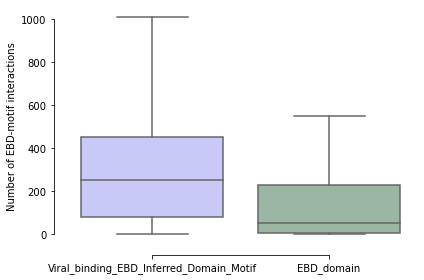

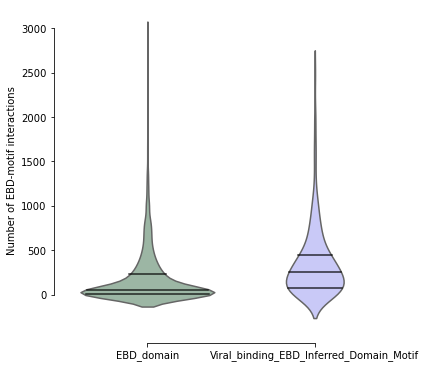

In [19]:
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Protein_interactions_by_domain_motif'].to_frame() 
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Protein_interactions_by_domain_motif'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb


Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Protein_interactions_by_domain_motif'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60



EBD_domain = df[df['EBD_domain']==1]['Protein_interactions_by_domain_motif'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Protein_interactions_by_domain_motif'].to_frame() 
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Protein_interactions_by_domain_motif'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb


Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Protein_interactions_by_domain_motif'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60



EBD_domain = df[df['EBD_domain']==1]['Protein_interactions_by_domain_motif'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain



df_merege = Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb.append([Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,
                                                                              Inferred_interface_Human_Domain_Motif_elm_hvidb,
                                                                              EBD_domain],ignore_index=True)


df_merege = df_merege.dropna()


#f.savefig("PPI_Interactions_by_domain_motif_all.pdf")


df_merege = df_merege[(df_merege['type'] == 'Viral_binding_EBD_Inferred_Domain_Motif') | (df_merege['type'] == 'EBD_domain')]
df_merege

colors =['#C1C2FF',
               '#98baa2']

f = plt.figure()
ax = sns.boxplot(x="type", y="Protein_interactions_by_domain_motif",data=df_merege,showfliers = False,palette=colors)
#ax.set_title('PPI_interactions_by_domain_motif_all')
#ax.set(xlabel ="Groups")
ax.set(xlabel ="",ylabel='Number of EBD-motif interactions')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
#ax.set_xticklabels([
       #'Viral_binding_EBD_Inferred_Domain_Motif',
       #'EBD_Domain'],rotation = -45, size =12)

plt.tight_layout()
ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\Protein_interactions_by_domain_motif_all_box.pdf',transparent=True)

colors =['#98baa2','#C1C2FF']

f = plt.figure(figsize=[6,6])
ax =sns.violinplot(x="type", y="Protein_interactions_by_domain_motif",data=df_merege,showfliers = False,palette=colors,cut=2,order=['EBD_domain','Viral_binding_EBD_Inferred_Domain_Motif'],
                  inner='quartile')
#ax.set_title('PPI_interactions_by_domain_motif_all')
#ax.set(xlabel ="Groups")
ax.set(xlabel ="",ylabel='Number of EBD-motif interactions')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
#ax.set_xticklabels([
       #'Viral_binding_EBD_Inferred_Domain_Motif',
       #'EBD_Domain'],rotation = -45, size =8)
for l in ax.lines:
     l.set_linestyle('-')
     l.set_color('black')
     l.set_alpha(0.8)


ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\Protein_interactions_by_domain_motif_all_violin.pdf',transparent=True)
    
x = df_merege[df_merege['type']=='Viral_binding_EBD_Inferred_Domain_Motif']['Protein_interactions_by_domain_motif']
y = df_merege[df_merege['type']=='EBD_domain']['Protein_interactions_by_domain_motif']
mannwhitneyu = scipy.stats.mannwhitneyu(y,x,use_continuity=True, alternative='less')
mannwhitneyu

# TPM all

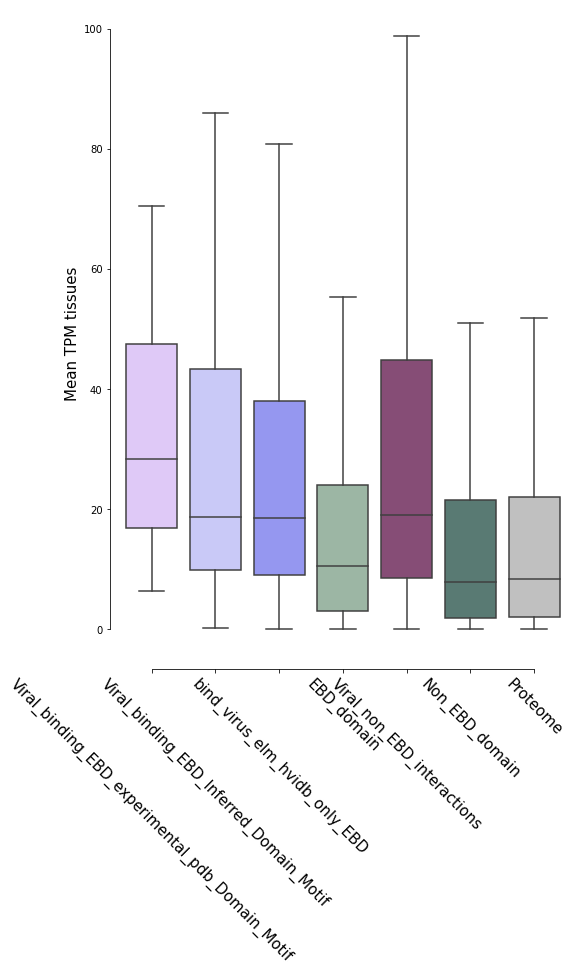

In [86]:
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'
Viral_non_EBD_interactions

EBD_domain = df[df['EBD_domain']==1]['Percentage_TPM_tissues'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain

non_EBD_domain = df[df['EBD_domain']==0]['Percentage_TPM_tissues'].to_frame()
non_EBD_domain['type'] = 'Non_EBD_domain'
non_EBD_domain

proteome =  df['Percentage_TPM_tissues'].to_frame()
proteome['type'] = 'Proteome'
proteome

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Percentage_TPM_tissues'].to_frame() 
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'

df_merege = Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb.append([Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,
                                                                              bind_virus_elm_hvidb_only_EBD,EBD_domain,
                                                                             Viral_non_EBD_interactions,
                                                                             non_EBD_domain,
                                                                              proteome],ignore_index=True)


list_colors = [
    '#dfc1ff','#C1C2FF','#8688ff',
               '#98baa2',
               '#8f447a',
               '#547f76',
               '#C0C0C0']


df_merege = df_merege.dropna()
df_merege

f = plt.figure(figsize=[8,12])
ax = sns.boxplot(x="type", y="Percentage_TPM_tissues",data=df_merege,showfliers = False,palette=list_colors)
#ax.set(ylim=(0,100))
plt.ylabel('Mean TPM tissues', fontsize = 15)
plt.xlabel('')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels(['Viral_binding_EBD_experimental_pdb_Domain_Motif',
       'Viral_binding_EBD_Inferred_Domain_Motif','bind_virus_elm_hvidb_only_EBD',
       'EBD_domain',
       'Viral_non_EBD_interactions', 'Non_EBD_domain',
       'Proteome'],rotation = -45, size =15)


ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\TPM_all.pdf',transparent=True)


In [87]:
list_name = ['Viral_binding_EBD_experimental_pdb_Domain_Motif',
       'Viral_binding_EBD_Inferred_Domain_Motif','bind_virus_elm_hvidb_only_EBD',
       'EBD_domain',
       'Viral_non_EBD_interactions', 'Non_EBD_domain']

list_name_2 = ['Proteome']
set_match = set()
for line in list_name:
    for row in list_name_2:
        if line != row:
            res = line+','+row
            check = row+','+line
            if check not in set_match:
                set_match.add(res)

set_match = [line.split(',') for line in set_match]
#print(set_match)


list_pvalue = []
for line in set_match:
    x = df_merege[df_merege['type'] == line[0]]['Percentage_TPM_tissues']
    y = df_merege[df_merege['type'] == line[1]]['Percentage_TPM_tissues']
    mannwhitneyu = scipy.stats.mannwhitneyu(x,y,use_continuity=True, alternative='two-sided')
    list_pvalue.append(line[0]+'\t\t'+line[1]+': '+str(mannwhitneyu[1]/2))

list_pvalue = [line.split(':') for line in list_pvalue]
list_pvalue_by_order = sorted(list_pvalue, key=lambda x: float(x[1]), reverse=False)

#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]
names

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

Viral_non_EBD_interactions		Proteome 0.0
bind_virus_elm_hvidb_only_EBD		Proteome 2.919211432274733e-91
Viral_binding_EBD_Inferred_Domain_Motif		Proteome 3.133436448259624e-31
EBD_domain		Proteome 4.2195450061732847e-10
Viral_binding_EBD_experimental_pdb_Domain_Motif		Proteome 1.657027262601664e-07
Non_EBD_domain		Proteome 0.0221222266559589


In [88]:
x = df_merege[df_merege['type'] == 'Non_EBD_domain']['Percentage_TPM_tissues']
y = df_merege[df_merege['type'] == 'Proteome']['Percentage_TPM_tissues']
y.mean()
mannwhitneyu = scipy.stats.mannwhitneyu(x,y,use_continuity=True, alternative='less')
mannwhitneyu

MannwhitneyuResult(statistic=157971328.5, pvalue=0.0221222266559589)

In [ ]:
# above 5

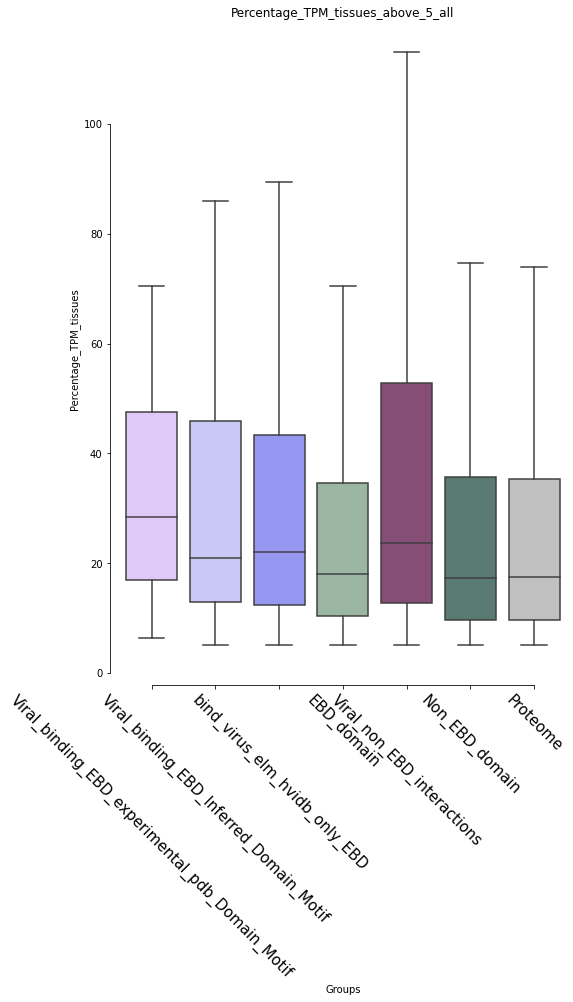

In [5]:
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'
Viral_non_EBD_interactions

EBD_domain = df[df['EBD_domain']==1]['Percentage_TPM_tissues'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain

non_EBD_domain = df[df['EBD_domain']==0]['Percentage_TPM_tissues'].to_frame()
non_EBD_domain['type'] = 'Non_EBD_domain'
non_EBD_domain

proteome =  df['Percentage_TPM_tissues'].to_frame()
proteome['type'] = 'Proteome'
proteome

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Percentage_TPM_tissues'].to_frame() 
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'

df_merege = Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb.append([Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,
                                                                              bind_virus_elm_hvidb_only_EBD,EBD_domain,
                                                                             Viral_non_EBD_interactions,
                                                                             non_EBD_domain,
                                                                              proteome],ignore_index=True)


list_colors = [
    '#dfc1ff','#C1C2FF','#8688ff',
               '#98baa2',
               '#8f447a',
               '#547f76',
               '#C0C0C0']


df_merege = df_merege.dropna()
df_merege


# above 5
    

df_merege = df_merege[df_merege['Percentage_TPM_tissues'] >= 5]
df_merege

f = plt.figure(figsize=[8,12])
ax = sns.boxplot(x="type", y="Percentage_TPM_tissues",data=df_merege,showfliers = False,palette=list_colors)
ax.set_title('Percentage_TPM_tissues_above_5_all')
ax.set(xlabel ="Groups")
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels(['Viral_binding_EBD_experimental_pdb_Domain_Motif',
       'Viral_binding_EBD_Inferred_Domain_Motif','bind_virus_elm_hvidb_only_EBD',
      'EBD_domain',
       'Viral_non_EBD_interactions', 'Non_EBD_domain',
       'Proteome'],rotation = -45, size =15)
#f.savefig('TPM_above_5_all.pdf')

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\TPM_above5_all.pdf',transparent=True)




In [6]:
list_name = ['Viral_binding_EBD_experimental_pdb_Domain_Motif',
       'Viral_binding_EBD_Inferred_Domain_Motif','bind_virus_elm_hvidb_only_EBD',
       'EBD_domain',
       'Viral_non_EBD_interactions', 'Non_EBD_domain']

list_name_2 = ['Proteome']
set_match = set()
for line in list_name:
    for row in list_name_2:
        if line != row:
            res = line+','+row
            check = row+','+line
            if check not in set_match:
                set_match.add(res)

set_match = [line.split(',') for line in set_match]
#print(set_match)


list_pvalue = []
for line in set_match:
    x = df_merege[df_merege['type'] == line[0]]['Percentage_TPM_tissues']
    y = df_merege[df_merege['type'] == line[1]]['Percentage_TPM_tissues']
    mannwhitneyu = scipy.stats.mannwhitneyu(x,y,use_continuity=True, alternative='two-sided')
    list_pvalue.append(line[0]+'\t\t'+line[1]+': '+str(mannwhitneyu[1]/2))

list_pvalue = [line.split(':') for line in list_pvalue]
list_pvalue_by_order = sorted(list_pvalue, key=lambda x: float(x[1]), reverse=False)

#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

#pvals = sorted([float(line[1]) for line in list_pvalue])
#names = sorted([line[0] for line in list_pvalue])
names = [line[0] for line in list_pvalue_by_order]
pvals = [float(line[1]) for line in list_pvalue_by_order]
names

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

Viral_non_EBD_interactions		Proteome 5.679205145602658e-64
bind_virus_elm_hvidb_only_EBD		Proteome 6.70651208669294e-12
Viral_binding_EBD_Inferred_Domain_Motif		Proteome 0.0003859057569456585
Viral_binding_EBD_experimental_pdb_Domain_Motif		Proteome 0.019635646861370704
EBD_domain		Proteome 0.37147844908997585
Non_EBD_domain		Proteome 0.4316482675924772


# Gene_essentially Domain motif 

In [89]:
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Gene_essentially'].to_frame() 
len_group = len(Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb[Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['Gene_essentially'] == 1])
res = 100*len_group/len(Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb)
print('Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb ',res)
#print('Inferred_interface_Human_Domain_Motif',len_group,len(Inferred_interface_Human_Domain_Motif_elm_hvidb)-len_group)

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Gene_essentially'].to_frame() 
len_group = len(Inferred_interface_Human_Domain_Motif_elm_hvidb[Inferred_interface_Human_Domain_Motif_elm_hvidb['Gene_essentially'] == 1])
#en(Inferred_interface_Human_Domain_Motif_elm_hvidb)
res = 100*len_group/len(Inferred_interface_Human_Domain_Motif_elm_hvidb)
print('Inferred_interface_Human_Domain_Motif',res)
#print('Inferred_interface_Human_Domain_Motif',len_group,len(Inferred_interface_Human_Domain_Motif_elm_hvidb)-len_group)

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Gene_essentially'].to_frame() 
len_group = len(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 [Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 ['Gene_essentially'] == 1])
#en(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60)
res = 100*len_group/len(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 )
print('Viral_binding_EBD_Inferred_Domain_Motif',res)
#print('Viral_binding_EBD_Inferred_Domain_Motif',len_group,len(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60)-len_group)


Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['Gene_essentially'].to_frame() 
len_group = len(Viral_non_EBD_interactions[Viral_non_EBD_interactions['Gene_essentially'] == 1])
#print(Viral_non_EBD_interactions[Viral_non_EBD_interactions['Gene_essentially'] == 1])
#en(Viral_non_EBD_interactions)
res = 100*len_group/len(Viral_non_EBD_interactions)
print('Viral_non_EBD_interactions',res)
#print('Viral_non_EBD_interactions',len_group,len(Viral_non_EBD_interactions)-len_group)


EBD_domain = df[df['EBD_domain']==1]['Gene_essentially'].to_frame() 
len_group = len(EBD_domain[EBD_domain['Gene_essentially'] == 1])
#en(Viral_non_EBD_interactions)
res = 100*len_group/len(EBD_domain)
print('EBD_domain',res)
#print('EBD_domain',len_group,len(EBD_domain)-len_group)


non_EBD_domain = df[df['EBD_domain']==0]['Gene_essentially'].to_frame() 
len_group = len(non_EBD_domain[non_EBD_domain['Gene_essentially'] == 1])
#en(Viral_non_EBD_interactions)
res = 100*len_group/len(non_EBD_domain)
print('non_EBD_domain',res)
#print('non_EBD_domain',len_group,len(non_EBD_domain)-len_group)

bind_virus_elm_hvidb_total = df[(df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1)]['Gene_essentially'].to_frame() 
len_group = len(bind_virus_elm_hvidb_total[bind_virus_elm_hvidb_total['Gene_essentially'] == 1])
#print(len(bind_virus_elm_hvidb_total))
res = 100*len_group/len(bind_virus_elm_hvidb_total)
print('bind_virus_elm_hvidb_total ',res)
#print('bind_virus_elm_hvidb_total ',len_group,len(bind_virus_elm_hvidb_total)-len_group)

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Gene_essentially'].to_frame() 
len_group = len(bind_virus_elm_hvidb_only_EBD[bind_virus_elm_hvidb_only_EBD['Gene_essentially'] == 1])
#print(len(bind_virus_elm_hvidb_only_EBD))
res = 100*len_group/len(bind_virus_elm_hvidb_only_EBD)
print('bind_virus_elm_hvidb_only_EBD',res)
#print('bind_virus_elm_hvidb_only_EBD',len_group,len(bind_virus_elm_hvidb_only_EBD)-len_group)

all_proteom = df[df['Gene_essentially']==1]
res = 100*len(all_proteom)/len(df)
print('all_proteom',res)
#print('all_proteom',len(all_proteom),len(df)-len_group)

Non_bind_virus_elm_hvidb_only_EBD = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)&(df['EBD_domain']==1)]['Gene_essentially'].to_frame() 
len_group = len(Non_bind_virus_elm_hvidb_only_EBD[Non_bind_virus_elm_hvidb_only_EBD ['Gene_essentially'] == 1])
#print(len(bind_virus_elm_hvidb_only_EBD))
res = 100*len_group/len(Non_bind_virus_elm_hvidb_only_EBD )
print('Non_bind_virus_elm_hvidb_only_EBD',res)
#print('Non_bind_virus_elm_hvidb_only_EBD',len_group,len(Non_bind_virus_elm_hvidb_only_EBD)-len_group)


Non_Viral_non_EBD_interactions = df[(df['Viral_non_EBD_interactions']==0)&(df['EBD_domain']==0)]['Gene_essentially'].to_frame() 
len_group = len(Non_Viral_non_EBD_interactions[Non_Viral_non_EBD_interactions['Gene_essentially'] == 1])
#print(Non_Viral_non_EBD_interactions[Non_Viral_non_EBD_interactions['Gene_essentially'] == 1])
res = 100*len_group/len(Non_Viral_non_EBD_interactions)
print('Non_Viral_non_EBD_interactions',res)
#print('Non_Viral_non_EBD_interactions',len_group,len(Non_Viral_non_EBD_interactions)-len_group)


Non_bind_virus_elm_hvidb_total = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)]['Gene_essentially'].to_frame() 
len_group = len(Non_bind_virus_elm_hvidb_total[Non_bind_virus_elm_hvidb_total['Gene_essentially'] == 1])
#print(len(bind_virus_elm_hvidb_total))
res = 100*len_group/len(Non_bind_virus_elm_hvidb_total)
print('Non_bind_virus_elm_hvidb_total',res)
#print('Non_bind_virus_elm_hvidb_total',len_group,len(Non_bind_virus_elm_hvidb_total)-len_group)

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb  6.25
Inferred_interface_Human_Domain_Motif 6.597671410090556
Viral_binding_EBD_Inferred_Domain_Motif 7.621951219512195
Viral_non_EBD_interactions 8.128544423440454
EBD_domain 7.844498438042346
non_EBD_domain 4.961657319446034
bind_virus_elm_hvidb_total  8.30912260313771
bind_virus_elm_hvidb_only_EBD 9.98452012383901
all_proteom 5.369688037337264
Non_bind_virus_elm_hvidb_only_EBD 6.104468219005664
Non_Viral_non_EBD_interactions 3.586671043992121
Non_bind_virus_elm_hvidb_total 3.867567366936382


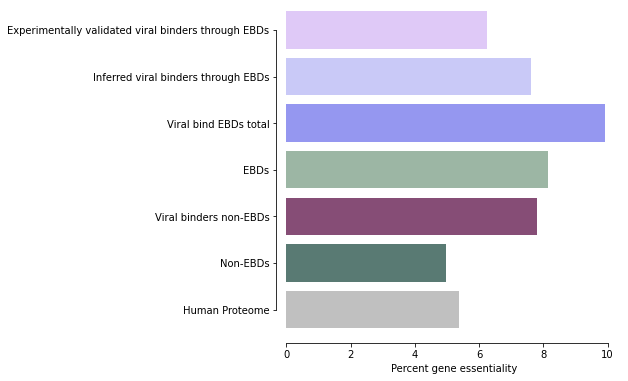

In [90]:
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb  = 6.25
Inferred_interface_Human_Domain_Motif =  6.597671410090556
Viral_binding_EBD_Inferred_Domain_Motif =7.621951219512195
Viral_non_EBD_interactions= 8.128544423440454
EBD_domain =7.815213615838833
non_EBD_domain =4.966811627374685
bind_virus_elm_hvidb_total = 8.30912260313771
bind_virus_elm_hvidb_only_EBD =9.922480620155039
all_proteom = 5.369688037337264
Non_bind_virus_elm_hvidb_only_EBD =6.104468219005664
Non_Viral_non_EBD_interactions =3.5942885278188084
Non_bind_virus_elm_hvidb_total =3.867567366936382


d = {'type': ['Experimentally validated viral binders through EBDs',
     'Inferred viral binders through EBDs','Viral bind EBDs total',
       'EBDs','Viral binders non-EBDs', 'Non-EBDs',
       'Human Proteome'],'Percent_gene_essentiality':[ 
                                              Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb,
                                              Viral_binding_EBD_Inferred_Domain_Motif,
                                              bind_virus_elm_hvidb_only_EBD,
                                            Viral_non_EBD_interactions,
                                              EBD_domain,
                                              non_EBD_domain,
                                              all_proteom]}



df_essentially = pd.DataFrame(data=d)
df_essentially


colors =  ['#dfc1ff','#C1C2FF','#8688ff',
               '#98baa2',
               '#8f447a',
               '#547f76',
               '#C0C0C0']

f = plt.figure(figsize=[6,6])
ax = sns.barplot(x="Percent_gene_essentiality", y="type", data=df_essentially,order=['Experimentally validated viral binders through EBDs',
     'Inferred viral binders through EBDs','Viral bind EBDs total',
       'EBDs','Viral binders non-EBDs', 'Non-EBDs',
       'Human Proteome'],palette=colors)
#ax.set_title('gene_essentially')
ax.set(xlabel='Percent gene essentiality')
plt.ylabel('')
sns.despine(offset=10,trim=True,fig=f,ax=ax)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\essentially_all.pdf',transparent=True)


In [91]:
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Gene_essentially'].to_frame() 
len_group = len(Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb[Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['Gene_essentially'] == 1])
res = 100*len_group/len(Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb)
#print('Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb ',res)
print('Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb',len_group,len(Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb)-len_group)

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Gene_essentially'].to_frame() 
len_group = len(Inferred_interface_Human_Domain_Motif_elm_hvidb[Inferred_interface_Human_Domain_Motif_elm_hvidb['Gene_essentially'] == 1])
#en(Inferred_interface_Human_Domain_Motif_elm_hvidb)
res = 100*len_group/len(Inferred_interface_Human_Domain_Motif_elm_hvidb)
#print('Inferred_interface_Human_Domain_Motif',res)
print('Inferred_interface_Human_Domain_Motif',len_group,len(Inferred_interface_Human_Domain_Motif_elm_hvidb)-len_group)

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Gene_essentially'].to_frame() 
len_group = len(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 [Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 ['Gene_essentially'] == 1])
#en(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60)
res = 100*len_group/len(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 )
#print('Viral_binding_EBD_Inferred_Domain_Motif',res)
print('Viral_binding_EBD_Inferred_Domain_Motif',len_group,len(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60)-len_group)


Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['Gene_essentially'].to_frame() 
len_group = len(Viral_non_EBD_interactions[Viral_non_EBD_interactions['Gene_essentially'] == 1])
#print(Viral_non_EBD_interactions[Viral_non_EBD_interactions['Gene_essentially'] == 1])
#en(Viral_non_EBD_interactions)
res = 100*len_group/len(Viral_non_EBD_interactions)
#print('Viral_non_EBD_interactions',res)
print('Viral_non_EBD_interactions',len_group,len(Viral_non_EBD_interactions)-len_group)


EBD_domain = df[df['EBD_domain']==1]['Gene_essentially'].to_frame() 
len_group = len(EBD_domain[EBD_domain['Gene_essentially'] == 1])
#en(Viral_non_EBD_interactions)
res = 100*len_group/len(EBD_domain)
#print('EBD_domain',res)
print('EBD_domain',len_group,len(EBD_domain)-len_group)


non_EBD_domain = df[df['EBD_domain']==0]['Gene_essentially'].to_frame() 
len_group = len(non_EBD_domain[non_EBD_domain['Gene_essentially'] == 1])
#en(Viral_non_EBD_interactions)
res = 100*len_group/len(non_EBD_domain)
#print('non_EBD_domain',res)
print('non_EBD_domain',len_group,len(non_EBD_domain)-len_group)

bind_virus_elm_hvidb_total = df[(df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1)]['Gene_essentially'].to_frame() 
len_group = len(bind_virus_elm_hvidb_total[bind_virus_elm_hvidb_total['Gene_essentially'] == 1])
#print(len(bind_virus_elm_hvidb_total))
res = 100*len_group/len(bind_virus_elm_hvidb_total)
#print('bind_virus_elm_hvidb_total ',res)
print('bind_virus_elm_hvidb_total ',len_group,len(bind_virus_elm_hvidb_total)-len_group)

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Gene_essentially'].to_frame() 
len_group = len(bind_virus_elm_hvidb_only_EBD[bind_virus_elm_hvidb_only_EBD['Gene_essentially'] == 1])
#print(len(bind_virus_elm_hvidb_only_EBD))
res = 100*len_group/len(bind_virus_elm_hvidb_only_EBD)
#print('bind_virus_elm_hvidb_only_EBD',res)
print('bind_virus_elm_hvidb_only_EBD',len_group,len(bind_virus_elm_hvidb_only_EBD)-len_group)

all_proteom = df[df['Gene_essentially']==1]
res = 100*len(all_proteom)/len(df)
#print('all_proteom',res)
print('all_proteom',len(all_proteom),len(df)-len(all_proteom))

Non_bind_virus_elm_hvidb_only_EBD = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)&(df['EBD_domain']==1)]['Gene_essentially'].to_frame() 
len_group = len(Non_bind_virus_elm_hvidb_only_EBD[Non_bind_virus_elm_hvidb_only_EBD ['Gene_essentially'] == 1])
#print(len(bind_virus_elm_hvidb_only_EBD))
res = 100*len_group/len(Non_bind_virus_elm_hvidb_only_EBD )
#print('Non_bind_virus_elm_hvidb_only_EBD',res)
print('Non_bind_virus_elm_hvidb_only_EBD',len_group,len(Non_bind_virus_elm_hvidb_only_EBD)-len_group)


Non_Viral_non_EBD_interactions = df[(df['Viral_non_EBD_interactions']==0)&(df['EBD_domain']==0)]['Gene_essentially'].to_frame() 
len_group = len(Non_Viral_non_EBD_interactions[Non_Viral_non_EBD_interactions['Gene_essentially'] == 1])
#print(Non_Viral_non_EBD_interactions[Non_Viral_non_EBD_interactions['Gene_essentially'] == 1])
res = 100*len_group/len(Non_Viral_non_EBD_interactions)
#print('Non_Viral_non_EBD_interactions',res)
print('Non_Viral_non_EBD_interactions',len_group,len(Non_Viral_non_EBD_interactions)-len_group)


Non_bind_virus_elm_hvidb_total = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)]['Gene_essentially'].to_frame() 
len_group = len(Non_bind_virus_elm_hvidb_total[Non_bind_virus_elm_hvidb_total['Gene_essentially'] == 1])
#print(len(bind_virus_elm_hvidb_total))
res = 100*len_group/len(Non_bind_virus_elm_hvidb_total)
#print('Non_bind_virus_elm_hvidb_total',res)
print('Non_bind_virus_elm_hvidb_total',len_group,len(Non_bind_virus_elm_hvidb_total)-len_group)


Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb 2 30
Inferred_interface_Human_Domain_Motif 51 722
Viral_binding_EBD_Inferred_Domain_Motif 25 303
Viral_non_EBD_interactions 430 4860
EBD_domain 226 2655
non_EBD_domain 867 16607
bind_virus_elm_hvidb_total  572 6312
bind_virus_elm_hvidb_only_EBD 129 1163
all_proteom 1093 19262
Non_bind_virus_elm_hvidb_only_EBD 97 1492
Non_Viral_non_EBD_interactions 437 11747
Non_bind_virus_elm_hvidb_total 521 12950


In [22]:
from scipy.stats import fisher_exact

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = [2,30]
Viral_binding_EBD_Inferred_Domain_Motif = [25, 303]
Viral_non_EBD_interactions = [430 ,4860]
EBD_domain =  [225, 2654]
non_EBD_domain = [868, 16608]
bind_virus_elm_hvidb_total = [572 ,6312]
bind_virus_elm_hvidb_only_EBD = [128 ,1162]
all_proteom = [1093 ,19262]
Non_bind_virus_elm_hvidb_only_EBD = [97, 1492]
Non_Viral_non_EBD_interactions = [438, 11748]
Non_bind_virus_elm_hvidb_total = [521, 12950]

print('##pvalue##')


# Viral_binding_EBD_experimental/Proteom
print('Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb/Proteom')
data = [Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

# Viral_binding_EBD_Inferred_Domain_Motif/Proteom
print('Viral_binding_EBD_Inferred_Domain_Motif/Proteom')
data = [Viral_binding_EBD_Inferred_Domain_Motif,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

# EBD/Proteom
print('EBD/Proteom')

data = [EBD_domain,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

#Non EBD / Proteom
print('Non EBD / Proteom')
data = [non_EBD_domain,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)

# bind_elm_only_ebd / Proteom
print('bind_elm_only_ebd / Proteom')
data = [bind_virus_elm_hvidb_only_EBD,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

# Viral_non_EBD_interactions / Protem
print('Viral_non_EBD_interactions / Proteom')
data = [Non_Viral_non_EBD_interactions,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)

#EBD/NON_EBD
print('EBD/NON_EBD')
data = [EBD_domain,non_EBD_domain]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

#bind_elm_only_ebd/Viral_non_EBD_interactions
print('bind_elm_only_ebd/ Viral_non_EBD_interactions')
data = [bind_virus_elm_hvidb_only_EBD,Viral_non_EBD_interactions]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

##pvalue##
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb/Proteom
0.5188345786544315
Viral_binding_EBD_Inferred_Domain_Moti/Proteom
0.05319585619205541
EBD/Proteom
2.2458901584640704e-07
Non EBD / Proteom
0.040918912129502064
bind_elm_only_ebd / Proteom
2.0849610585573346e-10
Viral_non_EBD_interactions / Proteom
5.590991914117348e-14
EBD/NON_EBD
1.452229217862086e-09
bind_elm_only_ebd/ Viral_non_EBD_interactions
0.023208647832899235


In [23]:
names = ['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb/Proteom','Viral_binding_EBD_Inferred_Domain_Motif/Proteom',
         'EBD/Proteom','Non EBD / Proteom','bind_elm_only_ebd / Proteom','Viral_non_EBD_interactions / Proteom']
pvals = [0.5188345786544315,0.05319585619205541,2.2458901584640704e-07,0.040918912129502064,2.0849610585573346e-10,5.590991914117348e-14]
cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb/Proteom 0.5188345786544315
Viral_binding_EBD_Inferred_Domain_Moti/Proteom 0.0638350274304665
EBD/Proteom 4.491780316928141e-07
Non EBD / Proteom 0.061378368194253095
bind_elm_only_ebd / Proteom 6.254883175672004e-10
Viral_non_EBD_interactions / Proteom 3.354595148470409e-13


# dn/ds all fix with domain motif

In [141]:
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')


Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['PSG_dn_ds'].to_frame() 
len_group = len(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 [Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 ['PSG_dn_ds'] == 1])
#en(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60)
denominator = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
print('Viral_binding_EBD_Inferred_Domain_Motif',res)
#print('Viral_binding_EBD_Inferred_Domain_Motif',len_group,len(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60)-len_group)

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['PSG_dn_ds'].to_frame() 
len_group = len(Viral_non_EBD_interactions[Viral_non_EBD_interactions['PSG_dn_ds'] == 1])
#print(Viral_non_EBD_interactions[Viral_non_EBD_interactions['Gene_essentially'] == 1])
#en(Viral_non_EBD_interactions)
denominator = df[(df['Viral_non_EBD_interactions']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
print('Viral_non_EBD_interactions',res)
#print('Viral_non_EBD_interactions',len_group,len(Viral_non_EBD_interactions)-len_group)


EBD_domain = df[df['EBD_domain']==1]['PSG_dn_ds'].to_frame() 
len_group = len(EBD_domain[EBD_domain['PSG_dn_ds'] == 1])
#en(Viral_non_EBD_interactions)
denominator = df[(df['EBD_domain']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
print('EBD_domain',res)
#print('EBD_domain',len_group,len(EBD_domain)-len_group)


non_EBD_domain = df[df['EBD_domain']==0]['PSG_dn_ds'].to_frame() 
len_group = len(non_EBD_domain[non_EBD_domain['PSG_dn_ds'] == 1])
#en(Viral_non_EBD_interactions)
denominator = df[(df['EBD_domain']==0)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
print('non_EBD_domain',res)
#print('non_EBD_domain',len_group,len(non_EBD_domain)-len_group)

bind_virus_elm_hvidb_total = df[(df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1)]['PSG_dn_ds'].to_frame() 
len_group = len(bind_virus_elm_hvidb_total[bind_virus_elm_hvidb_total['PSG_dn_ds'] == 1])
#print(len(bind_virus_elm_hvidb_total))
denominator = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
print('bind_virus_elm_hvidb_total ',res)
#print('bind_virus_elm_hvidb_total ',len_group,len(bind_virus_elm_hvidb_total)-len_group)


bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['PSG_dn_ds'].to_frame() 
len_group = len(bind_virus_elm_hvidb_only_EBD[bind_virus_elm_hvidb_only_EBD['PSG_dn_ds'] == 1])
#print(len(bind_virus_elm_hvidb_only_EBD))
denominator = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
print('bind_virus_elm_hvidb_only_EBD',res)
#print('bind_virus_elm_hvidb_only_EBD',len_group,len(bind_virus_elm_hvidb_only_EBD)-len_group)


all_proteom = df[df['PSG_dn_ds']==1]
res = 100*len(all_proteom)/11152
print('all_proteom',res)
#print('all_proteom',len(all_proteom),len(df)-len_group)




Non_bind_virus_elm_hvidb_only_EBD = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)&(df['EBD_domain']==1)]['PSG_dn_ds'].to_frame() 
len_group = len(Non_bind_virus_elm_hvidb_only_EBD[Non_bind_virus_elm_hvidb_only_EBD ['PSG_dn_ds'] == 1])
#print(len(bind_virus_elm_hvidb_only_EBD))
denominator = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)&(df['EBD_domain']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
print('Non_bind_virus_elm_hvidb_only_EBD',res)
#print('Non_bind_virus_elm_hvidb_only_EBD',len_group,len(Non_bind_virus_elm_hvidb_only_EBD)-len_group)

Non_Viral_non_EBD_interactions = df[(df['Viral_non_EBD_interactions']==0)&(df['EBD_domain']==0)]['PSG_dn_ds'].to_frame() 
len_group = len(Non_Viral_non_EBD_interactions[Non_Viral_non_EBD_interactions['PSG_dn_ds'] == 1])
#print(Non_Viral_non_EBD_interactions[Non_Viral_non_EBD_interactions['Gene_essentially'] == 1])
denominator = df[(df['Viral_non_EBD_interactions']==0)&(df['EBD_domain']==0)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
print('Non_Viral_non_EBD_interactions',res)
#print('Non_Viral_non_EBD_interactions',len_group,len(Non_Viral_non_EBD_interactions)-len_group)

Non_bind_virus_elm_hvidb_total = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)]['PSG_dn_ds'].to_frame() 
len_group = len(Non_bind_virus_elm_hvidb_total[Non_bind_virus_elm_hvidb_total['PSG_dn_ds'] == 1])
#print(len(bind_virus_elm_hvidb_total))
denominator = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
print('Non_bind_virus_elm_hvidb_total',res)
#print('Non_bind_virus_elm_hvidb_total',len_group,len(Non_bind_virus_elm_hvidb_total)-len_group)



Viral_binding_EBD_Inferred_Domain_Motif 0.8849557522123894
Viral_non_EBD_interactions 2.655401327700664
EBD_domain 1.5735214324470972
non_EBD_domain 3.23343001396498
bind_virus_elm_hvidb_total  2.345707128216807
bind_virus_elm_hvidb_only_EBD 1.6055045871559632
all_proteom 2.9591104734576756
Non_bind_virus_elm_hvidb_only_EBD 1.544799176107106
Non_Viral_non_EBD_interactions 3.552960800667223
Non_bind_virus_elm_hvidb_total 3.357491495340926


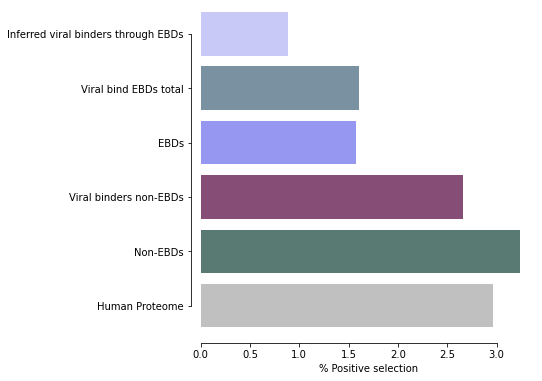

In [142]:
Viral_binding_EBD_Inferred_Domain_Motif= 0.8849557522123894
Viral_non_EBD_interactions =2.655401327700664
EBD_domain =1.5743756786102063
non_EBD_domain= 3.2330827067669174
bind_virus_elm_hvidb_total  =2.345707128216807
bind_virus_elm_hvidb_only_EBD =1.6073478760045925
all_proteom = 2.9591104734576756
Non_bind_virus_elm_hvidb_only_EBD =1.544799176107106
Non_Viral_non_EBD_interactions =3.552368245496998
Non_bind_virus_elm_hvidb_total =3.357491495340926



d = {'type': ['Inferred viral binders through EBDs','Viral bind EBDs total',
       'EBDs','Viral binders non-EBDs', 'Non-EBDs',
       'Human Proteome'],'Percent_dn_ds':[Viral_binding_EBD_Inferred_Domain_Motif,bind_virus_elm_hvidb_only_EBD,EBD_domain,Viral_non_EBD_interactions,non_EBD_domain,all_proteom]}
df_essentially = pd.DataFrame(data=d)
df_essentially


colors = [
    '#C1C2FF','#7393a7',
               '#8688ff',
               '#8f447a',
               '#547f76',
               '#C0C0C0']

f = plt.figure(figsize=[6,6])
ax = sns.barplot(x="Percent_dn_ds", y="type", data=df_essentially,order=['Inferred viral binders through EBDs','Viral bind EBDs total',
       'EBDs','Viral binders non-EBDs', 'Non-EBDs',
       'Human Proteome'],palette=colors)
plt.ylabel('')
#ax.set_title('dn/ds')
ax.set(xlabel='% Positive selection')
sns.despine(offset=10,trim=True,fig=f,ax=ax)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\dn_ds_all.pdf',transparent=True)


In [96]:
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['PSG_dn_ds'].to_frame() 
len_group = len(Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb[Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['PSG_dn_ds'] == 1])
denominator = df[(df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb ',res)
print('Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb',len_group,len(denominator)-len_group)


Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['PSG_dn_ds'].to_frame() 
len_group = len(Inferred_interface_Human_Domain_Motif_elm_hvidb[Inferred_interface_Human_Domain_Motif_elm_hvidb['PSG_dn_ds'] == 1])
#en(Inferred_interface_Human_Domain_Motif_elm_hvidb)
denominator = df[(df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('Inferred_interface_Human_Domain_Motif',res)
print('Inferred_interface_Human_Domain_Motif',len_group,len(denominator)-len_group)

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['PSG_dn_ds'].to_frame() 
len_group = len(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 [Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 ['PSG_dn_ds'] == 1])
#en(Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60)
denominator = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('Viral_binding_EBD_Inferred_Domain_Motif',res)
print('Viral_binding_EBD_Inferred_Domain_Motif',len_group,len(denominator)-len_group)

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['PSG_dn_ds'].to_frame() 
len_group = len(Viral_non_EBD_interactions[Viral_non_EBD_interactions['PSG_dn_ds'] == 1])
#print(Viral_non_EBD_interactions[Viral_non_EBD_interactions['Gene_essentially'] == 1])
#en(Viral_non_EBD_interactions)
denominator = df[(df['Viral_non_EBD_interactions']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('Viral_non_EBD_interactions',res)
print('Viral_non_EBD_interactions',len_group,len(denominator)-len_group)


EBD_domain = df[df['EBD_domain']==1]['PSG_dn_ds'].to_frame() 
len_group = len(EBD_domain[EBD_domain['PSG_dn_ds'] == 1])
#en(Viral_non_EBD_interactions)
denominator = df[(df['EBD_domain']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('EBD_domain',res)
print('EBD_domain',len_group,len(denominator)-len_group)


non_EBD_domain = df[df['EBD_domain']==0]['PSG_dn_ds'].to_frame() 
len_group = len(non_EBD_domain[non_EBD_domain['PSG_dn_ds'] == 1])
#en(Viral_non_EBD_interactions)
denominator = df[(df['EBD_domain']==0)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('non_EBD_domain',res)
print('non_EBD_domain',len_group,len(denominator)-len_group)

bind_virus_elm_hvidb_total = df[(df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1)]['PSG_dn_ds'].to_frame() 
len_group = len(bind_virus_elm_hvidb_total[bind_virus_elm_hvidb_total['PSG_dn_ds'] == 1])
#print(len(bind_virus_elm_hvidb_total))
denominator = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('bind_virus_elm_hvidb_total ',res)
print('bind_virus_elm_hvidb_total ',len_group,len(denominator)-len_group)


bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['PSG_dn_ds'].to_frame() 
len_group = len(bind_virus_elm_hvidb_only_EBD[bind_virus_elm_hvidb_only_EBD['PSG_dn_ds'] == 1])
#print(len(bind_virus_elm_hvidb_only_EBD))
denominator = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('bind_virus_elm_hvidb_only_EBD',res)
print('bind_virus_elm_hvidb_only_EBD',len_group,len(denominator)-len_group)


all_proteom = df[df['PSG_dn_ds']==1]
res = 100*len(all_proteom)/11152
#print('all_proteom',res)
print('all_proteom',len(all_proteom),11152-len(all_proteom))



Non_bind_virus_elm_hvidb_only_EBD = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)&(df['EBD_domain']==1)]['PSG_dn_ds'].to_frame() 
len_group = len(Non_bind_virus_elm_hvidb_only_EBD[Non_bind_virus_elm_hvidb_only_EBD ['PSG_dn_ds'] == 1])
#print(len(bind_virus_elm_hvidb_only_EBD))
denominator = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)&(df['EBD_domain']==1)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('Non_bind_virus_elm_hvidb_only_EBD',res)
print('Non_bind_virus_elm_hvidb_only_EBD',len_group,len(denominator)-len_group)

Non_Viral_non_EBD_interactions = df[(df['Viral_non_EBD_interactions']==0)&(df['EBD_domain']==0)]['PSG_dn_ds'].to_frame() 
len_group = len(Non_Viral_non_EBD_interactions[Non_Viral_non_EBD_interactions['PSG_dn_ds'] == 1])
#print(Non_Viral_non_EBD_interactions[Non_Viral_non_EBD_interactions['Gene_essentially'] == 1])
denominator = df[(df['Viral_non_EBD_interactions']==0)&(df['EBD_domain']==0)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('Non_Viral_non_EBD_interactions',res)
print('Non_Viral_non_EBD_interactions',len_group,len(denominator)-len_group)

Non_bind_virus_elm_hvidb_total = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)]['PSG_dn_ds'].to_frame() 
len_group = len(Non_bind_virus_elm_hvidb_total[Non_bind_virus_elm_hvidb_total['PSG_dn_ds'] == 1])
#print(len(bind_virus_elm_hvidb_total))
denominator = df[(df['Hvidb_Experimentally_verified_complex_structures']==0)&(df['Hvidb_Human_virus_PPI_data']==0)&(df['Bind_pathogen_elm']==0)&(df['orthologs_ensembl_78']==1)]
res = 100*len_group/len(denominator)
#print('Non_bind_virus_elm_hvidb_total',res)
print('Non_bind_virus_elm_hvidb_total',len_group,len(denominator)-len_group)

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb 0 26
Inferred_interface_Human_Domain_Motif 5 515
Viral_binding_EBD_Inferred_Domain_Motif 2 224
Viral_non_EBD_interactions 88 3226
EBD_domain 29 1814
non_EBD_domain 301 9008
bind_virus_elm_hvidb_total  103 4288
bind_virus_elm_hvidb_only_EBD 14 858
all_proteom 330 10822
Non_bind_virus_elm_hvidb_only_EBD 15 956
Non_Viral_non_EBD_interactions 213 5782
Non_bind_virus_elm_hvidb_total 227 6534


In [97]:
from scipy.stats import fisher_exact

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = [0 ,26] 
Inferred_interface_Human_Domain_Motif  = [5 ,515]
Viral_binding_EBD_Inferred_Domain_Motif = [2 ,224]
Viral_non_EBD_interactions = [88 ,3226]
EBD_domain = [29,1813]
non_EBD_domain = [301, 9009]
bind_virus_elm_hvidb_total  =[ 103 ,4288]
bind_virus_elm_hvidb_only_EBD =[14 ,779]
all_proteom=[330 ,10766]
Non_bind_virus_elm_hvidb_only_EBD=[15, 956]
Non_Viral_non_EBD_interactions=[213, 5783]
Non_bind_virus_elm_hvidb_total=[227,6534]


print('##pvalue##')

# EBD/Proteom
print('EBD/Proteom')

data = [EBD_domain,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)

#Non EBD / Proteom
print('Non EBD / Proteom')
data = [non_EBD_domain,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

# bind_elm_only_ebd / Proteom
print('bind virus EBD / Proteom')
data = [bind_virus_elm_hvidb_only_EBD,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)

# Viral_non_EBD_interactions / Proteom
print('Viral_non_EBD_interactions / Proteom')
data = [Non_Viral_non_EBD_interactions,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

# Viral_binding_EBD_Inferred_Domain_Motif / Proteom
print('Viral_binding_EBD_Inferred_Domain_Motif / Proteom')
data = [Viral_binding_EBD_Inferred_Domain_Motif,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)


#EBD/NON_EBD
print('EBD/NON_EBD')
data = [EBD_domain,non_EBD_domain]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)

#EBD/Viral_non_EBD_interactions
print('EBD/Viral_non_EBD_interactions')
data = [EBD_domain,Viral_non_EBD_interactions]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

#bind_elm_only_ebd/Viral_non_EBD_interactions
print('bind_elm_only_ebd/Viral_non_EBD_interactions')
data = [bind_virus_elm_hvidb_only_EBD,Viral_non_EBD_interactions]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)

#Experimentally validated/Viral_non_EBD_interactions
print('Experimentally validated/proteom')
data = [Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb,all_proteom]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)

#bind_elm_only_ebd/Viral_non_EBD_interactions
print('Viral_binding_EBD_Inferred_Domain_Motif/Viral_non_EBD_interactions')
data = [Viral_binding_EBD_Inferred_Domain_Motif,Viral_non_EBD_interactions]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)


##pvalue##
EBD/Proteom
0.0002098175081141798
Non EBD / Proteom
0.1529035725390912
bind virus EBD / Proteom
0.0260752286163934
Viral_non_EBD_interactions / Proteom
0.022761068399253383
Viral_binding_EBD_Inferred_Domain_Motif / Proteom
0.035907611632752995
EBD/NON_EBD
2.7533716485504223e-05
EBD/Viral_non_EBD_interactions
0.996115859394585
bind_elm_only_ebd/Viral_non_EBD_interactions
0.08982879746551405
Experimentally validated/proteom
0.4565691178062648
Viral_binding_EBD_Inferred_Domain_Motif/Viral_non_EBD_interactions
0.0655825392827565


In [98]:
names = ['EBD/Proteom','Non EBD / Proteom','bind virus EBD / Proteom','Viral_non_EBD_interactions / Proteom',
         'Viral_binding_EBD_Inferred_Domain_Motif / Proteom']
pvals = [0.0002098175081141798,0.1529035725390912,0.0260752286163934,0.022761068399253383,0.035907611632752995]
cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

EBD/Proteom 0.001049087540570899
Non EBD / Proteom 0.1529035725390912
bind virus EBD / Proteom 0.04345871436065567
Viral_non_EBD_interactions / Proteom 0.04345871436065567
Viral_binding_EBD_Inferred_Domain_Motif / Proteom 0.044884514540941244


# PPI + dn/ds

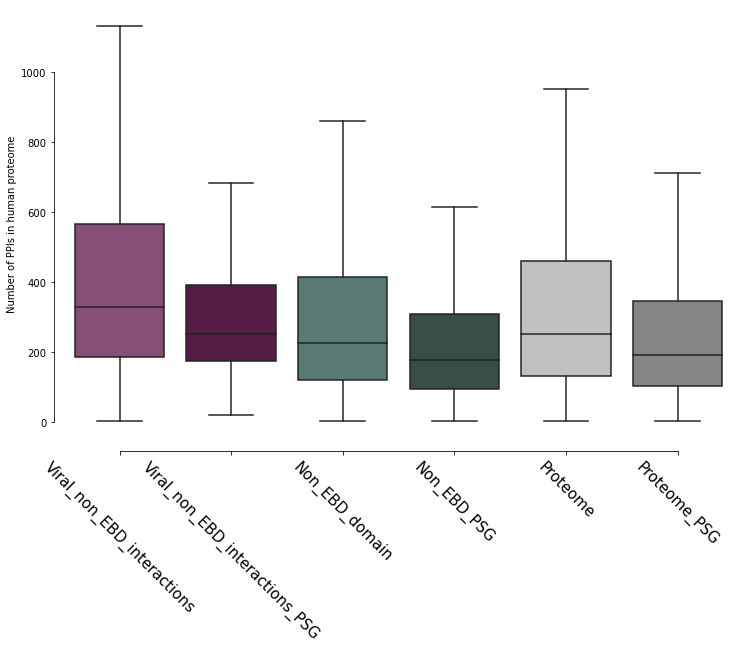

In [5]:
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

#Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['PPI_string'].to_frame() 

#Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'


#Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['PPI_string'].to_frame() 

#Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'


Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['PPI_string'].to_frame()

Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'


EBD_domain = df[df['EBD_domain']==1]['PPI_string'].to_frame()

EBD_domain['type'] = 'EBD_domain'


non_EBD_domain = df[df['EBD_domain']==0]['PPI_string'].to_frame()

non_EBD_domain['type'] = 'Non_EBD_domain'


proteome =  df['PPI_string'].to_frame()

proteome['type'] = 'Proteome'

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['PPI_string'].to_frame()
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'


Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


EBD_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
EBD_PSG['type'] = 'EBD_PSG'

Non_EBD_PSG = df[(df['EBD_domain']==0)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Non_EBD_PSG['type'] = 'Non_EBD_PSG'

proteome_PSG =  df[df['PSG_dn_ds']==1]['PPI_string'].to_frame()
proteome_PSG['type'] = 'Proteome_PSG'

Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['PSG_dn_ds']==1))]['PPI_string'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'

df_merege =Viral_non_EBD_interactions.append([
                               Viral_non_EBD_interactions,Viral_non_EBD_interactions_PSG,
                               non_EBD_domain,
                                Non_EBD_PSG,
                                proteome,proteome_PSG],ignore_index=True)


list_colors = ['#8f447a','#5e1349','#547f76','#35504a','#C0C0C0','#858585']


df_merege = df_merege.dropna()



f = plt.figure(figsize=[12,8])
ax = sns.boxplot(x="type", y="PPI_string",data=df_merege,showfliers = False,palette=list_colors)
#ax.set_title('PPI_string_all')
ax.set(ylabel ="Number of PPIs in human proteome", xlabel='')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels([
       'Viral_non_EBD_interactions','Viral_non_EBD_interactions_PSG', 'Non_EBD_domain','Non_EBD_PSG',
       'Proteome','Proteome_PSG'],rotation = -45, size =15)



ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\ppi_dn_ds_all.pdf',transparent=True)


In [13]:
df_merege[df_merege['type']=='Viral_non_EBD_interactions_PSG'].median()

df_merege[df_merege['type']=='Proteome'].median()

df_merege[df_merege['type']=='Viral_non_EBD_interactions'].median()

C:\Users\TZACHI~1\AppData\Local\Temp/ipykernel_7052/3486128218.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_merege[df_merege['type']=='Viral_non_EBD_interactions_PSG'].median()
C:\Users\TZACHI~1\AppData\Local\Temp/ipykernel_7052/3486128218.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_merege[df_merege['type']=='Proteome'].median()
C:\Users\TZACHI~1\AppData\Local\Temp/ipykernel_7052/3486128218.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_merege[df_merege['ty

PPI_string    327.5
dtype: float64

In [14]:
list_name = [
       'Viral_non_EBD_interactions','Viral_non_EBD_interactions_PSG', 'Non_EBD_domain','Non_EBD_PSG',
       'Proteome','Proteome_PSG']

list_name_2 = [
       'Viral_non_EBD_interactions','Viral_non_EBD_interactions_PSG', 'Non_EBD_domain','Non_EBD_PSG',
       'Proteome','Proteome_PSG']

set_match = set()
for line in list_name:
    for row in list_name_2:
        if line != row:
            res = line+','+row
            check = row+','+line
            if check not in set_match:
                set_match.add(res)

set_match = [line.split(',') for line in set_match]
#print(set_match)


list_pvalue = []
for line in set_match:
    x = df_merege[df_merege['type'] == line[0]]['PPI_string']
    y = df_merege[df_merege['type'] == line[1]]['PPI_string']
    mannwhitneyu = scipy.stats.mannwhitneyu(x,y,use_continuity=True, alternative='two-sided')
    list_pvalue.append(line[0]+'\t\t'+line[1]+': '+str(mannwhitneyu[1]/2))

list_pvalue = [line.split(':') for line in list_pvalue]
list_pvalue_by_order = sorted(list_pvalue, key=lambda x: float(x[1]), reverse=False)

for i in list_pvalue_by_order:
    print(i)

['Viral_non_EBD_interactions\t\tNon_EBD_domain', ' 1.0478246770123654e-175']
['Viral_non_EBD_interactions\t\tProteome', ' 3.269412792264349e-96']
['Viral_non_EBD_interactions\t\tNon_EBD_PSG', ' 3.3651752536307815e-24']
['Non_EBD_domain\t\tProteome', ' 8.76426663318579e-20']
['Viral_non_EBD_interactions\t\tProteome_PSG', ' 1.0280085597277165e-18']
['Non_EBD_PSG\t\tProteome', ' 2.007869615924668e-08']
['Proteome\t\tProteome_PSG', ' 2.5014756617576905e-05']
['Non_EBD_domain\t\tNon_EBD_PSG', ' 6.260675484494438e-05']
['Viral_non_EBD_interactions_PSG\t\tNon_EBD_PSG', ' 0.0006758481886114045']
['Viral_non_EBD_interactions\t\tViral_non_EBD_interactions_PSG', ' 0.0067583416029352635']
['Viral_non_EBD_interactions_PSG\t\tProteome_PSG', ' 0.009451289407018497']
['Non_EBD_domain\t\tProteome_PSG', ' 0.009918541629696307']
['Viral_non_EBD_interactions_PSG\t\tNon_EBD_domain', ' 0.1084330729063176']
['Non_EBD_PSG\t\tProteome_PSG', ' 0.12437960083245608']
['Viral_non_EBD_interactions_PSG\t\tProteome',

In [16]:
list_name = [
       'Viral_non_EBD_interactions','Viral_non_EBD_interactions_PSG', 'Non_EBD_domain','Non_EBD_PSG',
       'Proteome','Proteome_PSG']

list_name_2 = [
       'Viral_non_EBD_interactions','Viral_non_EBD_interactions_PSG', 'Non_EBD_domain','Non_EBD_PSG',
       'Proteome','Proteome_PSG']

set_match = set()
for line in list_name:
    for row in list_name_2:
        if line != row:
            res = line+','+row
            check = row+','+line
            if check not in set_match:
                set_match.add(res)

set_match = [line.split(',') for line in set_match]
#print(set_match)


list_pvalue = []
for line in set_match:
    x = df_merege[df_merege['type'] == line[0]]['PPI_string']
    y = df_merege[df_merege['type'] == line[1]]['PPI_string']
    mannwhitneyu = scipy.stats.mannwhitneyu(x,y,use_continuity=True, alternative='two-sided')
    list_pvalue.append(line[0]+'\t\t'+line[1]+': '+str(mannwhitneyu[1]/2))

list_pvalue = [line.split(':') for line in list_pvalue]
list_pvalue_by_order = sorted(list_pvalue, key=lambda x: float(x[1]), reverse=False)

names = ['Viral_non_EBD_interactions\t\tViral_non_EBD_interactions_PSG','Non_EBD_domain\t\tNon_EBD_PSG','Proteome\t\tProteome_PSG','Viral_non_EBD_interactions_PSG\t\tProteome']
pvals = [0.0067583416029352635,6.260675484494438e-05,2.5014756617576905e-05,0.4124901636922996]

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

Viral_non_EBD_interactions		Viral_non_EBD_interactions_PSG 0.009011122137247017
Non_EBD_domain		Non_EBD_PSG 0.00012521350968988876
Proteome		Proteome_PSG 0.00010005902647030762
Viral_non_EBD_interactions_PSG		Proteome 0.4124901636922996


In [7]:
# ppi + dn/ds only_ebd

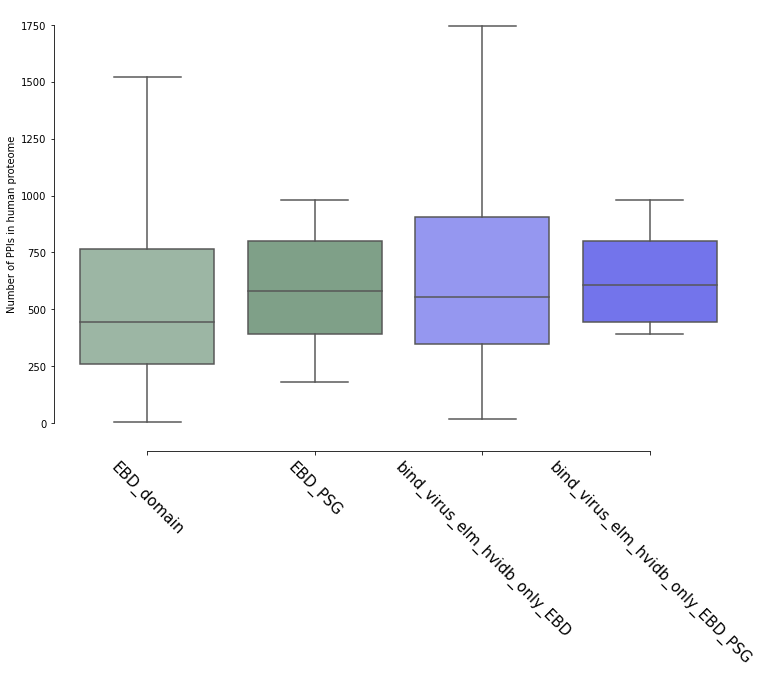

In [8]:
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

#Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['PPI_string'].to_frame() 

#Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'


#Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['PPI_string'].to_frame() 

#Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'


Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['PPI_string'].to_frame()

Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'


EBD_domain = df[df['EBD_domain']==1]['PPI_string'].to_frame()

EBD_domain['type'] = 'EBD_domain'


non_EBD_domain = df[df['EBD_domain']==0]['PPI_string'].to_frame()

non_EBD_domain['type'] = 'Non_EBD_domain'


proteome =  df['PPI_string'].to_frame()

proteome['type'] = 'Proteome'

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['PPI_string'].to_frame()
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'


Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


EBD_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
EBD_PSG['type'] = 'EBD_PSG'

Non_EBD_PSG = df[(df['EBD_domain']==0)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Non_EBD_PSG['type'] = 'Non_EBD_PSG'

proteome_PSG =  df[df['PSG_dn_ds']==1]['PPI_string'].to_frame()
proteome_PSG['type'] = 'Proteome_PSG'


bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['PSG_dn_ds']==1))]['PPI_string'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'

df_merege = EBD_domain.append([EBD_PSG,
                               #Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,
                               #Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG,
                               bind_virus_elm_hvidb_only_EBD,
                               bind_virus_elm_hvidb_only_EBD_PSG,
                              ],ignore_index=True)


list_colors = ['#98baa2','#79a686','#8688ff','#5f61ff']


df_merege = df_merege.dropna()



f = plt.figure(figsize=[12,8])
ax = sns.boxplot(x="type", y="PPI_string",data=df_merege,showfliers = False,palette=list_colors)
#ax.set_title('PPI_string_all')
ax.set(ylabel ="Number of PPIs in human proteome", xlabel='')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels(['EBD_domain','EBD_PSG','bind_virus_elm_hvidb_only_EBD' ,'bind_virus_elm_hvidb_only_EBD_PSG',
       ],rotation = -45, size =15)


ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\EBD_EBD_bind_ppi_dn_ds_all.pdf',transparent=True)



In [9]:
list_name = ['EBD_domain','EBD_PSG',
       'bind_virus_elm_hvidb_only_EBD' ,'bind_virus_elm_hvidb_only_EBD_PSG']
list_name_2 = ['EBD_domain','EBD_PSG',
       'bind_virus_elm_hvidb_only_EBD' ,'bind_virus_elm_hvidb_only_EBD_PSG']


set_match = set()
for line in list_name:
    for row in list_name_2:
        if line != row:
            res = line+','+row
            check = row+','+line
            if check not in set_match:
                set_match.add(res)

set_match = [line.split(',') for line in set_match]
#print(set_match)


list_pvalue = []
for line in set_match:
    x = df_merege[df_merege['type'] == line[0]]['PPI_string']
    y = df_merege[df_merege['type'] == line[1]]['PPI_string']
    mannwhitneyu = scipy.stats.mannwhitneyu(x,y,use_continuity=True, alternative='two-sided')
    list_pvalue.append(line[0]+'\t\t'+line[1]+': '+str(mannwhitneyu[1]/2))

list_pvalue = [line.split(':') for line in list_pvalue]
list_pvalue_by_order = sorted(list_pvalue, key=lambda x: float(x[1]), reverse=False)

for line in list_pvalue_by_order:
    print(line)

['EBD_domain\t\tbind_virus_elm_hvidb_only_EBD', ' 1.2939124532501855e-16']
['EBD_domain\t\tbind_virus_elm_hvidb_only_EBD_PSG', ' 0.07027976975726903']
['EBD_domain\t\tEBD_PSG', ' 0.08797941861624048']
['EBD_PSG\t\tbind_virus_elm_hvidb_only_EBD_PSG', ' 0.30183829675067786']
['bind_virus_elm_hvidb_only_EBD\t\tbind_virus_elm_hvidb_only_EBD_PSG', ' 0.36883939677443967']
['EBD_PSG\t\tbind_virus_elm_hvidb_only_EBD', ' 0.4188441572053907']


In [103]:
names = ['EBD_domain\t\tEBD_PSG','bind_virus_elm_hvidb_only_EBD\t\tbind_virus_elm_hvidb_only_EBD_PSG']
pvals = [0.08797941861624042,0.36883939677443967]

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

EBD_domain		EBD_PSG 0.17595883723248085
bind_virus_elm_hvidb_only_EBD		bind_virus_elm_hvidb_only_EBD_PSG 0.36883939677443967


# through domain - motif  EBD

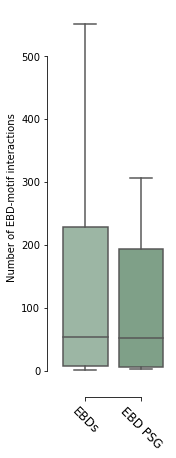

In [11]:
# final meta_data
# with no uniprot
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

EBD_domain_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['Protein_interactions_by_domain_motif'].to_frame()
EBD_domain_PSG['type'] = 'EBD_domain_PSG'
EBD_domain_PSG


EBD_domain = df[df['EBD_domain']==1]['Protein_interactions_by_domain_motif'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain


df_merege = EBD_domain.append([EBD_domain_PSG],ignore_index=True)


df_merege = df_merege.dropna()

df_merege.type.unique()

colors =['#98baa2','#79a686']

f = plt.figure(figsize=[2,7])
ax = sns.boxplot(x="type", y="Protein_interactions_by_domain_motif",data=df_merege,showfliers = False,palette=colors)
#ax.set_title('PPI_interactions_by_domain_motif_all')
#ax.set(xlabel ="Groups")
ax.set(xlabel ="",ylabel='Number of EBD-motif interactions')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels([
       'EBDs',
       'EBD PSG'],rotation = -45, size =12)

    
ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\EBD_dn_ds_all.pdf',transparent=True)


In [12]:
x = df_merege[df_merege['type']=='EBD_domain_PSG']['Protein_interactions_by_domain_motif']
y = df_merege[df_merege['type']=='EBD_domain']['Protein_interactions_by_domain_motif']
mannwhitneyu = scipy.stats.mannwhitneyu(y,x,use_continuity=True, alternative='less')
mannwhitneyu

MannwhitneyuResult(statistic=15586.0, pvalue=0.5197812943620377)

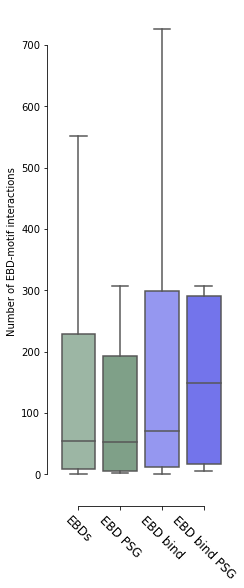

In [17]:
# final meta_data
# with no uniprot
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

EBD_domain_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['Protein_interactions_by_domain_motif'].to_frame()
EBD_domain_PSG['type'] = 'EBD_domain_PSG'
EBD_domain_PSG


EBD_domain = df[df['EBD_domain']==1]['Protein_interactions_by_domain_motif'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Protein_interactions_by_domain_motif'].to_frame()
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'

bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['Protein_interactions_by_domain_motif'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'
df_merege = EBD_domain.append([EBD_domain_PSG,bind_virus_elm_hvidb_only_EBD,bind_virus_elm_hvidb_only_EBD_PSG],ignore_index=True)


df_merege = df_merege.dropna()

df_merege.type.unique()

list_colors = ['#98baa2','#79a686','#8688ff','#5f61ff']

f = plt.figure(figsize=[3,9])
ax = sns.boxplot(x="type", y="Protein_interactions_by_domain_motif",data=df_merege,showfliers = False,palette=list_colors)
#ax.set_title('PPI_interactions_by_domain_motif_all')
#ax.set(xlabel ="Groups")
ax.set(xlabel ="",ylabel='Number of EBD-motif interactions')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels([
       'EBDs',
       'EBD PSG', 'EBD bind','EBD bind PSG'],rotation = -45, size =12)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\EBD_EBD_bind_domain_motif_all.pdf',transparent=True)
    


In [21]:
x = df_merege[df_merege['type']=='bind_virus_elm_hvidb_only_EBD_PSG']['Protein_interactions_by_domain_motif']
y = df_merege[df_merege['type']=='bind_virus_elm_hvidb_only_EBD']['Protein_interactions_by_domain_motif']
mannwhitneyu = scipy.stats.mannwhitneyu(y,x,use_continuity=True, alternative='less')
mannwhitneyu

MannwhitneyuResult(statistic=3176.5, pvalue=0.3356124086129916)

In [22]:
names = ['EBD_domain\t\tEBD_PSG','bind_virus_elm_hvidb_only_EBD\t\tbind_virus_elm_hvidb_only_EBD_PSG']
pvals = [0.5197812943620377,0.3356124086129916]

cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals_result = cors_pvals[1]
cors_pvals_result

dict_cors_pvals_result = dict(zip(names,cors_pvals_result))
dict_cors_pvals_result

for key,value in dict_cors_pvals_result.items():
    print(key,value)

EBD_domain		EBD_PSG 0.5197812943620377
bind_virus_elm_hvidb_only_EBD		bind_virus_elm_hvidb_only_EBD_PSG 0.5197812943620377


# split to Anti viral gene and non anti viral

In [53]:
EBD_domain_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]
EBD_domain_PSG

,Protein,Uniprot_id,Concatenation,Pfam_ID,Start_End_domain,EBD_domain,Bind_pathogen_elm,Bind_human_elm,Hvidb_Experimentally_verified_complex_structures,Hvidb_Human_virus_PPI_data,...,Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,Viral_non_EBD_interactions,Protein_with_EBD_and_non_EBD_domain,Average_rate,Protein_interactions_by_domain_motif,Multi_virus_EBD_domain_motif,Percentage_expressed_tissues,Percentage_TPM_tissues,Gene_essentially,orthologs_ensembl_78
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000154548,ENSP00000414302,Q8WXF0,0,PF00076,12-82,1,0,0,0,1,...,0,0,0,NaN,20.0,0.0,0.035714,1.197674,0,1
ENSG00000163554,ENSP00000495214,P02549,0,PF00018;PF08726;PF00435;PF00435;PF00435;PF0043...,983-1028;2350-2418;53-156;158-262;264-368;370-...,1,0,0,0,1,...,0,0,1,NaN,NaN,0.0,NaN,1.158140,1,1
ENSG00000122194,ENSP00000308938,P00747,0,PF00089;PF00024;PF00051;PF00051;PF00051;PF0005...,581-803;23-99;103-181;185-262;275-352;377-454;...,1,0,0,1,1,...,0,0,1,NaN,7.0,0.0,NaN,47.774419,0,1
ENSG00000196684,ENSP00000483354,Q96JZ2,0,PF00017,34-109,1,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,15.362791,0,1
ENSG00000135828,ENSP00000356530,Q05823,0,PF00069;PF06479;PF00023;PF00023,368-524;592-720;58-89;167-200,1,0,0,0,0,...,0,0,1,NaN,2806.0,0.0,0.837500,9.818605,0,1
ENSG00000016602,ENSP00000359594,Q14CN2,0,PF00092;PF08434,307-472;24-289,1,0,0,0,0,...,0,0,1,NaN,NaN,0.0,NaN,20.941860,0,1
ENSG00000101203,ENSP00000414753,Q9P218,0,PF00092;PF01391;PF01391;PF00041;PF00041;PF0004...,179-349;1069-1144;1126-1193;378-457;468-547;55...,1,0,0,0,0,...,0,0,1,NaN,NaN,0.0,NaN,0.472093,0,1
ENSG00000177414,ENSP00000481174,Q5VVX9,0,PF00179,8-147,1,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,1.939535,0,1
ENSG00000101888,ENSP00000218004,Q9NPJ8,0,PF02136,17-136,1,0,0,0,0,...,0,0,0,NaN,NaN,0.0,0.611765,10.211628,0,1


In [51]:
EBD_domain_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]
for i in EBD_domain_PSG['Uniprot_id'].to_list():
    print(i)

Q8WXF0
P02549
P00747
Q96JZ2
Q05823
Q14CN2
Q9P218
Q5VVX9
Q9NPJ8
B7ZKJ8
Q6UXN9
P49863
P56817
A0A2U3TZE7
P12544
Q5THR3
Q8IV63
Q14676
Q8IUH4
O96009
Q9NR97
H0YL70
P23759
Q92851
P29466
Q9C035
P10144
E7ETH0
Q9Y572


In [52]:
EBD_domain_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]
for i in EBD_domain_PSG.index.to_list():
    print(i)

ENSG00000154548
ENSG00000163554
ENSG00000122194
ENSG00000196684
ENSG00000135828
ENSG00000016602
ENSG00000101203
ENSG00000177414
ENSG00000101888
ENSG00000055955
ENSG00000164091
ENSG00000113088
ENSG00000186318
ENSG00000100473
ENSG00000145649
ENSG00000186976
ENSG00000105053
ENSG00000137337
ENSG00000177054
ENSG00000131400
ENSG00000101916
ENSG00000140332
ENSG00000009709
ENSG00000003400
ENSG00000137752
ENSG00000132256
ENSG00000100453
ENSG00000205403
ENSG00000129465


<ipython-input-110-76971f1c272c>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Anti_viral['type'] = 'Anti_viral'
<ipython-input-110-76971f1c272c>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_Anti_viral['type'] = 'Non_Anti_viral'


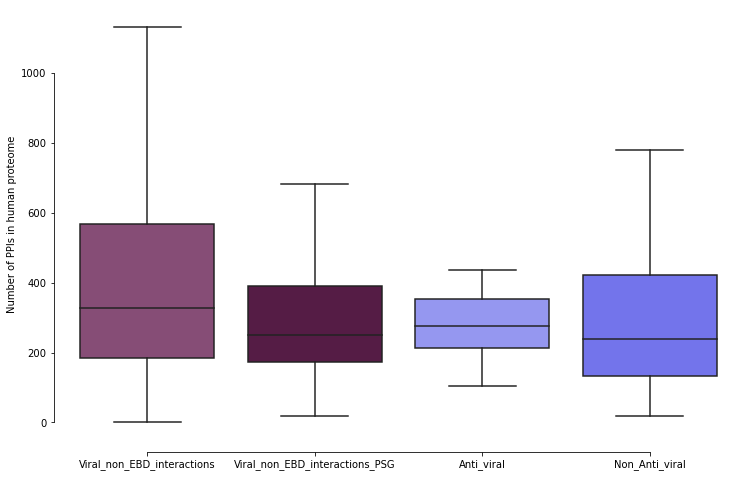

In [110]:
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

#Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['PPI_string'].to_frame() 

#Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'


#Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['PPI_string'].to_frame() 

#Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'


Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['PPI_string'].to_frame()

Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'


EBD_domain = df[df['EBD_domain']==1]['PPI_string'].to_frame()

EBD_domain['type'] = 'EBD_domain'


non_EBD_domain = df[df['EBD_domain']==0]['PPI_string'].to_frame()

non_EBD_domain['type'] = 'Non_EBD_domain'


proteome =  df['PPI_string'].to_frame()

proteome['type'] = 'Proteome'

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['PPI_string'].to_frame()
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'


Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


EBD_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
EBD_PSG['type'] = 'EBD_PSG'

Non_EBD_PSG = df[(df['EBD_domain']==0)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Non_EBD_PSG['type'] = 'Non_EBD_PSG'

proteome_PSG =  df[df['PSG_dn_ds']==1]['PPI_string'].to_frame()
proteome_PSG['type'] = 'Proteome_PSG'


bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['PSG_dn_ds']==1))]['PPI_string'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'

df_merege = EBD_domain.append([EBD_PSG,
                               #Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,
                               #Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG,
                               bind_virus_elm_hvidb_only_EBD,
                               bind_virus_elm_hvidb_only_EBD_PSG,
                               Viral_non_EBD_interactions,Viral_non_EBD_interactions_PSG,
                               Viral_non_EBD_interactions_PSG,
                               non_EBD_domain,
                                Non_EBD_PSG,
                                proteome,proteome_PSG],ignore_index=True)


list_colors = ['#98baa2','#79a686','#a3b8c6',
               '#7393a7','#8f447a','#5e1349','#547f76','#35504a','#C0C0C0','#858585']


df_merege = df_merege.dropna()


path_in_gene = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\19_g_profiler\\'
with open(path_in_gene+'Anti_viral_proteins.txt') as Anti_viral_proteins:
    Anti_viral_proteins = [line.split('\n')[0].strip() for line in Anti_viral_proteins]
len(Anti_viral_proteins)

Anti_viral = Viral_non_EBD_interactions_PSG[Viral_non_EBD_interactions_PSG.index.isin(Anti_viral_proteins)]
Anti_viral['type'] = 'Anti_viral'

non_Anti_viral = Viral_non_EBD_interactions_PSG[~(Viral_non_EBD_interactions_PSG.index.isin(Anti_viral_proteins))]
non_Anti_viral['type'] = 'Non_Anti_viral'


Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['PPI_string'].to_frame()

Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'

df_merege = Viral_non_EBD_interactions.append([
                               Viral_non_EBD_interactions_PSG,
                               Anti_viral,non_Anti_viral],ignore_index=True)
df_merege = df_merege.dropna()

list_colors = ['#8f447a','#5e1349','#8688ff','#5f61ff']

f = plt.figure(figsize=[12,8])
ax = sns.boxplot(x="type", y="PPI_string",data=df_merege,palette=list_colors,showfliers = False)
#ax.set_title('PPI_string_all')
ax.set(ylabel ="Number of PPIs in human proteome", xlabel='')
sns.despine(offset=10,trim=True,fig=f,ax=ax)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\PPI_dn_ds_viral_non_EBD_Antivial_non_Antiviral.pdf',transparent=True)


<ipython-input-108-644fa80cc99b>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Anti_viral['type'] = 'Anti_viral'
<ipython-input-108-644fa80cc99b>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_Anti_viral['type'] = 'Non_Anti_viral'


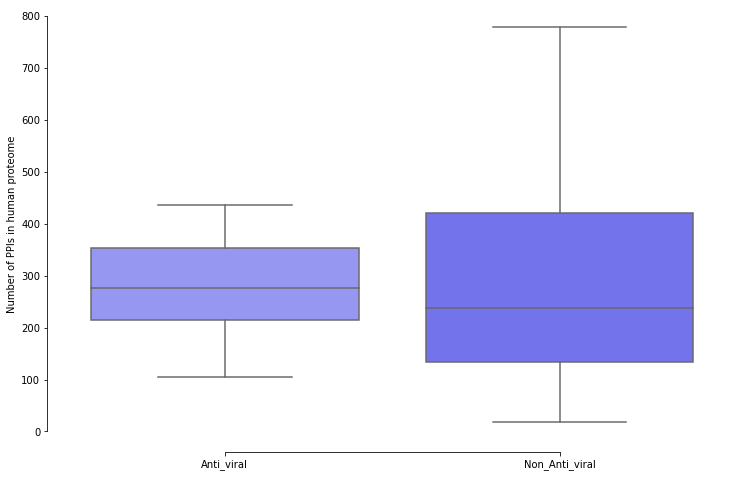

In [108]:
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

#Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['PPI_string'].to_frame() 

#Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'


#Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['PPI_string'].to_frame() 

#Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'


Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['PPI_string'].to_frame()

Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'


EBD_domain = df[df['EBD_domain']==1]['PPI_string'].to_frame()

EBD_domain['type'] = 'EBD_domain'


non_EBD_domain = df[df['EBD_domain']==0]['PPI_string'].to_frame()

non_EBD_domain['type'] = 'Non_EBD_domain'


proteome =  df['PPI_string'].to_frame()

proteome['type'] = 'Proteome'

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['PPI_string'].to_frame()
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'


Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


EBD_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
EBD_PSG['type'] = 'EBD_PSG'

Non_EBD_PSG = df[(df['EBD_domain']==0)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Non_EBD_PSG['type'] = 'Non_EBD_PSG'

proteome_PSG =  df[df['PSG_dn_ds']==1]['PPI_string'].to_frame()
proteome_PSG['type'] = 'Proteome_PSG'


bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['PSG_dn_ds']==1))]['PPI_string'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'

df_merege = EBD_domain.append([EBD_PSG,
                               #Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,
                               #Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG,
                               bind_virus_elm_hvidb_only_EBD,
                               bind_virus_elm_hvidb_only_EBD_PSG,
                               Viral_non_EBD_interactions,Viral_non_EBD_interactions_PSG,
                               Viral_non_EBD_interactions_PSG,
                               non_EBD_domain,
                                Non_EBD_PSG,
                                proteome,proteome_PSG],ignore_index=True)


list_colors = ['#98baa2','#79a686','#a3b8c6',
               '#7393a7','#8f447a','#5e1349','#547f76','#35504a','#C0C0C0','#858585']


df_merege = df_merege.dropna()


path_in_gene = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\19_g_profiler\\'
with open(path_in_gene+'Anti_viral_proteins.txt') as Anti_viral_proteins:
    Anti_viral_proteins = [line.split('\n')[0].strip() for line in Anti_viral_proteins]
len(Anti_viral_proteins)

Anti_viral = Viral_non_EBD_interactions_PSG[Viral_non_EBD_interactions_PSG.index.isin(Anti_viral_proteins)]
Anti_viral['type'] = 'Anti_viral'

non_Anti_viral = Viral_non_EBD_interactions_PSG[~(Viral_non_EBD_interactions_PSG.index.isin(Anti_viral_proteins))]
non_Anti_viral['type'] = 'Non_Anti_viral'


Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['PPI_string'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['PPI_string'].to_frame()

Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'

df_merege = Anti_viral.append([non_Anti_viral],ignore_index=True)
df_merege = df_merege.dropna()

list_colors = ['#8688ff','#5f61ff']

f = plt.figure(figsize=[12,8])
ax = sns.boxplot(x="type", y="PPI_string",data=df_merege,palette=list_colors,showfliers = False)
#ax.set_title('PPI_string_all')
ax.set(ylabel ="Number of PPIs in human proteome", xlabel='')
sns.despine(offset=10,trim=True,fig=f,ax=ax)

In [109]:
Anti_viral = Viral_non_EBD_interactions_PSG[Viral_non_EBD_interactions_PSG.index.isin(Anti_viral_proteins)]['PPI_string']
Anti_viral = Anti_viral.dropna()
Anti_viral

non_Anti_viral = Viral_non_EBD_interactions_PSG[~(Viral_non_EBD_interactions_PSG.index.isin(Anti_viral_proteins))]['PPI_string']
non_Anti_viral = non_Anti_viral.dropna()
non_Anti_viral

scipy.stats.mannwhitneyu(non_Anti_viral,Anti_viral,use_continuity=True, alternative='less')


MannwhitneyuResult(statistic=409.0, pvalue=0.22900575714798355)

# all inter inra

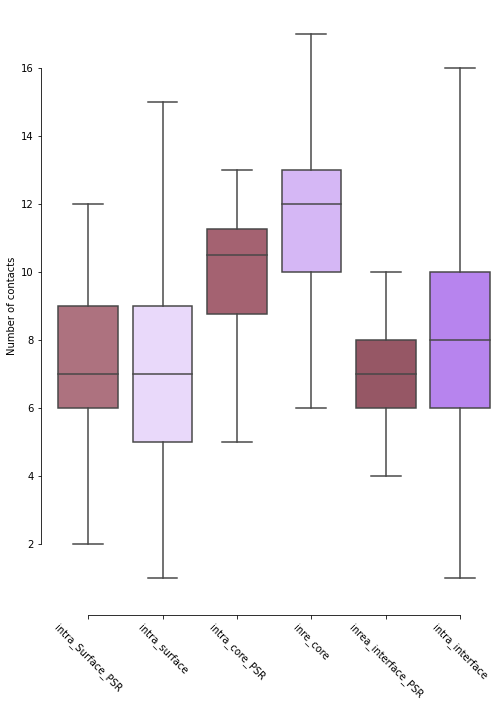

In [40]:
path_in = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\18_Viral_Non_EBD_PSG_Update\41_union_new_old_viral_non_EBD_intraction\\'

df = pd.read_csv(path_in+'Union_intra_inter_PSR.txt')
df = df[df.type != 'inter_interface']
df = df[df.type != 'inter_interface_PSR']

colors_union = ['#b7687a','#e9d4ff','#af576b','#d5adff','#a04c5f','#b773ff']


f = plt.figure(figsize=[8,11])
ax = sns.boxplot(x="type", y="number_intra_contact",data=df,showfliers = False,palette=colors_union,width=0.8)#,notch=True)
#ax.get_legend().remove()
#ax.set_title('Intra inter contacts') 
ax.set(xlabel='', ylabel='Number of contacts')
sns.despine(offset=10, trim=True)

ax.set_xticklabels(labels=['intra_Surface_PSR','intra_surface','intra_core_PSR','inre_core','inrea_interface_PSR','intra_interface'],
                   rotation = -45, size =10)
#plt.savefig('inter_intra.png')

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\intra_inter_PSR_all.pdf',transparent=True)


In [41]:
intra_surface_PSR = df[df['type'] == 'intra_surface_PSR']['number_intra_contact']
print(len(intra_surface_PSR))

intra_surface = df[df['type'] == 'intra_surface']['number_intra_contact']
print(len(intra_surface))

intra_core_PSR = df[df['type'] == 'intra_core_PSR']['number_intra_contact']
print(len(intra_core_PSR))

intra_core = df[df['type'] == 'intra_core']['number_intra_contact']
print(len(intra_core))

intra_interface_PSR = df[df['type'] == 'intra_interface_PSR']['number_intra_contact']
print(len(intra_interface_PSR))

intra_interface = df[df['type'] == 'intra_interface']['number_intra_contact']
print(len(intra_interface))


93
5883
12
4826
36
1828


In [42]:
intra_surface_PSR = df[df['type'] == 'intra_surface_PSR']['number_intra_contact']
intra_surface_PSR

intra_surface = df[df['type'] == 'intra_surface']['number_intra_contact']
intra_surface

intra_core_PSR = df[df['type'] == 'intra_core_PSR']['number_intra_contact']
intra_core_PSR

intra_core = df[df['type'] == 'intra_core']['number_intra_contact']
intra_core

intra_interface_PSR = df[df['type'] == 'intra_interface_PSR']['number_intra_contact']
intra_interface_PSR

intra_interface = df[df['type'] == 'intra_interface']['number_intra_contact']
intra_interface


10850     5
10851    11
10852     5
10853     8
10854     9
         ..
12673     5
12674     7
12675     8
12676     5
12677    10
Name: number_intra_contact, Length: 1828, dtype: int64

In [46]:
# intra surfae PSR , Intra surface 
print('intra surfae PSR/Intra surface')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_surface_PSR,intra_surface,use_continuity=True, alternative='less')
print(mannwhitneyu)

print('intra core PSR/Intra core')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_core_PSR,intra_core,use_continuity=True, alternative='less')
print(mannwhitneyu)

print('intra interface PSR/Intra interface')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_interface_PSR,intra_interface,use_continuity=True, alternative='less')
print(mannwhitneyu)




intra surfae PSR/Intra surface
MannwhitneyuResult(statistic=279301.0, pvalue=0.636935655968396)
intra core PSR/Intra core
MannwhitneyuResult(statistic=19068.0, pvalue=0.019570787455127314)
intra interface PSR/Intra interface
MannwhitneyuResult(statistic=26829.0, pvalue=0.02779720305676924)


In [47]:
pvals = [0.636935655968396,0.019570787455127314,0.02779720305676924]
cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals

(array([False,  True,  True]),
 array([0.63693566, 0.0416958 , 0.0416958 ]),
 0.016952427508441503,
 0.016666666666666666)

# Inter PSR

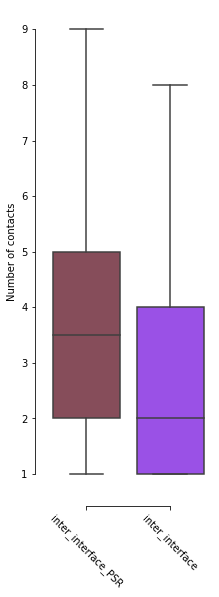

In [116]:
path_in = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\18_Viral_Non_EBD_PSG_Update\41_union_new_old_viral_non_EBD_intraction\\'

df = pd.read_csv(path_in+'Union_intra_inter_PSR.txt')

colors_union = ['#8f4455','#9938ff']

df = df[(df.type == 'inter_interface')|(df.type == 'inter_interface_PSR')]

f = plt.figure(figsize=[3,9])
ax = sns.boxplot(x="type", y="number_intra_contact",data=df,showfliers = False,palette=colors_union,width=0.8)#,notch=True)
#ax.get_legend().remove()
#ax.set_title('Intra inter contacts') 
ax.set(xlabel='', ylabel='Number of contacts')
sns.despine(offset=10, trim=True)

ax.set_xticklabels(labels=['inter_interface_PSR','inter_interface'],
                   rotation = -45, size =10)
#plt.savefig('inter_intra.png')
ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\inter_PSR_all.pdf',transparent=True)


In [117]:
inter_interface_PSR = df[df['type'] == 'inter_interface_PSR']['number_intra_contact']
inter_interface_PSR

inter_interface = df[df['type'] == 'inter_interface']['number_intra_contact']
inter_interface

print('inter interface PSR/Intera interface')
mannwhitneyu = scipy.stats.mannwhitneyu(inter_interface_PSR,inter_interface,use_continuity=True, alternative='greater')
print(mannwhitneyu)

inter interface PSR/Intera interface
MannwhitneyuResult(statistic=43580.5, pvalue=0.0001748861772360455)


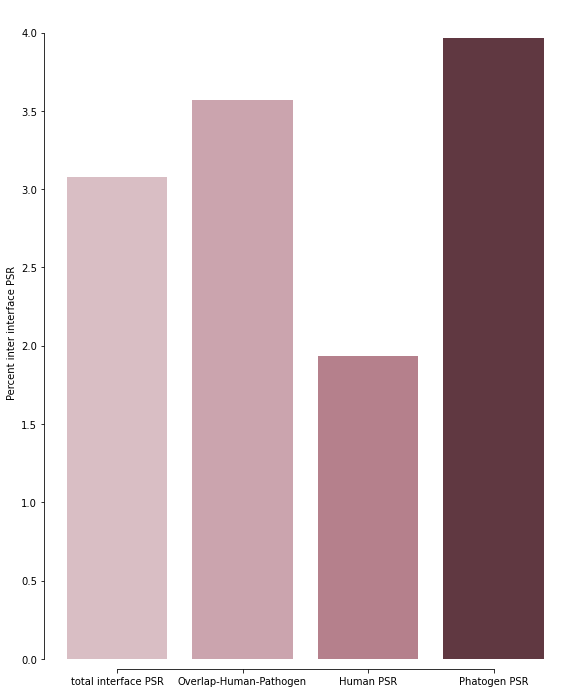

In [118]:
d = {'type': ['total interface PSR','Overlap-Human-Pathogen','Human PSR','Phatogen PSR'],'Percent_PSR':[3.080082136,3.571428571,1.93236715,3.968253968]}
df_PSG = pd.DataFrame(data=d)

colors = ['#deb9c2','#d19eab','#be7787','#67313d']

f = plt.figure(figsize=[9,12])
ax = sns.barplot(y="Percent_PSR",x="type", data=df_PSG,palette=colors,ci=120)
ax.set(xlabel='',ylabel='Percent inter interface PSR')
sns.despine(offset=10,trim=True,fig=f,ax=ax)

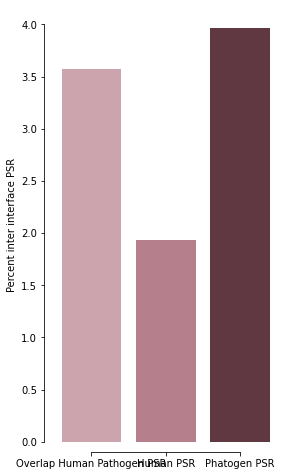

In [119]:
d = {'type': ['Overlap Human Pathogen PSR','Human PSR','Phatogen PSR'],'Percent_PSR':[3.571428571,1.93236715,3.968253968]}
df_PSG = pd.DataFrame(data=d)

colors = ['#d19eab','#be7787','#67313d']

f = plt.figure(figsize=[4,8])
ax = sns.barplot(y="Percent_PSR",x="type", data=df_PSG,palette=colors,ci=120)
ax.set(xlabel='',ylabel='Percent inter interface PSR')
sns.despine(offset=10,trim=True,fig=f,ax=ax)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\Percent_inter_interface_PSR.pdf',transparent=True)

In [120]:
all_inter = [15,472]
human = [4,203]
pathogen = [10,242]
both_human_patohgen = [1,27]

#EBD/NON_EBD

data = [all_inter,pathogen]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print('all_inter/pathogen')
print(pvalue)



data = [all_inter,human]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print('all_inter/human')
print(pvalue)

data = [human,pathogen]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print('human/pathogen')
print(pvalue)

data = [all_inter,both_human_patohgen ]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print('all_inter/Overlap-Human-Pathogen')
print(pvalue)

data = [both_human_patohgen,pathogen]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print('Overlap-Human-Pathogen/pathogen')
print(pvalue)


data = [both_human_patohgen,human]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print('Overlap-Human-Pathogen/human')
print(pvalue)


all_inter/pathogen
0.33173767481751737
all_inter/human
0.2845414254654727
human/pathogen
0.16147646794310033
all_inter/Overlap-Human-Pathogen
0.5967200990130047
Overlap-Human-Pathogen/pathogen
0.6931464407714952
Overlap-Human-Pathogen/human
0.47279681326782463


In [121]:
# inter intras split to Anti viral and Non Anti viral

In [122]:
path_in_gene = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\19_g_profiler\\'
with open(path_in_gene+'Anti_viral_proteins.txt') as Anti_viral_proteins:
    Anti_viral_proteins = [line.split('\n')[0].strip() for line in Anti_viral_proteins]
len(Anti_viral_proteins)

Anti_viral = Viral_non_EBD_interactions_PSG[Viral_non_EBD_interactions_PSG.index.isin(Anti_viral_proteins)]
Anti_viral['type'] = 'Anti_viral'

non_Anti_viral = Viral_non_EBD_interactions_PSG[~(Viral_non_EBD_interactions_PSG.index.isin(Anti_viral_proteins))]
non_Anti_viral['type'] = 'Non_Anti_viral'

non_Anti_viral.index.to_list()
Anti_viral.index.to_list()

# final meta_data
# with no uniprot
df = pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')
df

<ipython-input-122-69cec1328e6b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Anti_viral['type'] = 'Anti_viral'
<ipython-input-122-69cec1328e6b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_Anti_viral['type'] = 'Non_Anti_viral'


,Protein,Uniprot_id,Concatenation,Pfam_ID,Start_End_domain,EBD_domain,Bind_pathogen_elm,Bind_human_elm,Hvidb_Experimentally_verified_complex_structures,Hvidb_Human_virus_PPI_data,...,Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,Viral_non_EBD_interactions,Protein_with_EBD_and_non_EBD_domain,Average_rate,Protein_interactions_by_domain_motif,Multi_virus_EBD_domain_motif,Percentage_expressed_tissues,Percentage_TPM_tissues,Gene_essentially,orthologs_ensembl_78
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000167359,ENSP00000369559,Q9H343,0,PF13853,33-312,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.002326,0,0
ENSG00000176302,ENSP00000314806,Q6PIV2,0,PF00250,172-262,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.081395,0,1
ENSG00000138768,ENSP00000264904,O60763,1,PF04869;PF04871;PF18770,344-628;784-954;269-329,0,0,0,0,1,...,0,1,0,0.734774,NaN,0.0,NaN,44.465116,0,1
ENSG00000281935,ENSP00000488646,A0A0J9YY17,0,PF12780;PF12774;PF03028;PF12775;PF12781;PF1819...,1498-1757;519-845;2598-2711;1141-1322;2131-235...,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000280529,ENSP00000487182,A0A0G2JRY5,0,PF05236;PF07531,206-454;1-55,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000276253,ENSP00000481534,A0A0G2JNJ9,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000288623,ENSP00000502390,A0A6Q8PGS0,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000284526,ENSP00000491046,A0A1W2PNU3,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,5.516279,0,0


In [123]:
non_Anti_viral_uniprot = df[df.index.isin(non_Anti_viral.index.to_list())]['Uniprot_id'].to_list()
len(non_Anti_viral_uniprot)

Anti_viral_genesd_uniprot = df[df.index.isin(Anti_viral.index.to_list())]['Uniprot_id'].to_list()
len(Anti_viral_genesd_uniprot)

32

In [124]:
path_in = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\18_Viral_Non_EBD_PSG_Update\41_union_new_old_viral_non_EBD_intraction\\'

df = pd.read_csv(path_in+'Union_intra_inter_PSR.txt')

df_anti_viral = df[df['Uniprot'].isin(Anti_viral_genesd_uniprot)]

df_non_anti_viral = df[df['Uniprot'].isin(non_Anti_viral_uniprot)]



In [125]:
# union anti viral non anti viral

In [126]:

df_anti_viral['class'] = df['type']+'_Anti_viral'
df_non_anti_viral['class'] = df['type']+'_Non_Anti_Viral'

df_non_anti_viral

df_union = pd.concat([df_anti_viral,df_non_anti_viral])
df_union['class'].unique()




<ipython-input-126-f33eaf392b05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anti_viral['class'] = df['type']+'_Anti_viral'
<ipython-input-126-f33eaf392b05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_anti_viral['class'] = df['type']+'_Non_Anti_Viral'


array(['intra_surface_PSR_Anti_viral', 'intra_surface_Anti_viral',
       'intra_core_PSR_Anti_viral', 'intra_core_Anti_viral',
       'intra_interface_PSR_Anti_viral', 'intra_interface_Anti_viral',
       'inter_interface_PSR_Anti_viral', 'inter_interface_Anti_viral',
       'intra_surface_PSR_Non_Anti_Viral', 'intra_surface_Non_Anti_Viral',
       'intra_core_PSR_Non_Anti_Viral', 'intra_core_Non_Anti_Viral',
       'intra_interface_PSR_Non_Anti_Viral',
       'intra_interface_Non_Anti_Viral',
       'inter_interface_PSR_Non_Anti_Viral',
       'inter_interface_Non_Anti_Viral'], dtype=object)

In [127]:
order = ['intra_surface_PSR_Anti_viral', 'intra_surface_PSR_Non_Anti_Viral',
 'intra_surface_Anti_viral', 'intra_surface_Non_Anti_Viral',
         
       'intra_core_PSR_Anti_viral','intra_core_PSR_Non_Anti_Viral',
 'intra_core_Anti_viral','intra_core_Non_Anti_Viral',
         
       'intra_interface_PSR_Anti_viral', 'intra_interface_PSR_Non_Anti_Viral',
        'intra_interface_Anti_viral','intra_interface_Non_Anti_Viral',
         
       'inter_interface_PSR_Anti_viral','inter_interface_PSR_Non_Anti_Viral',
    'inter_interface_Anti_viral','inter_interface_Non_Anti_Viral']

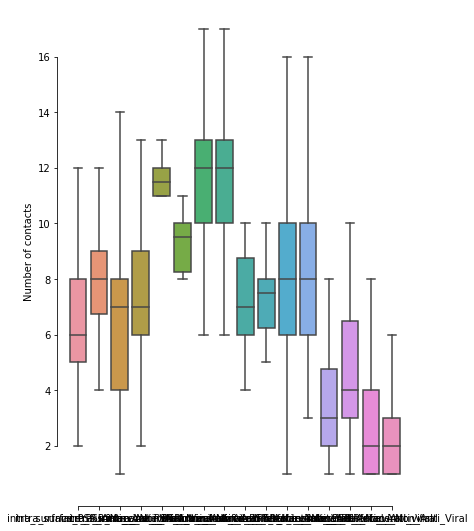

In [128]:
f = plt.figure(figsize=[6,9])
ax = sns.boxplot(x="class", y="number_intra_contact",data=df_union,showfliers = False,width=0.8,
                order= order)

ax.set(xlabel='', ylabel='Number of contacts')
sns.despine(offset=10, trim=True)


In [129]:
# anti viral 

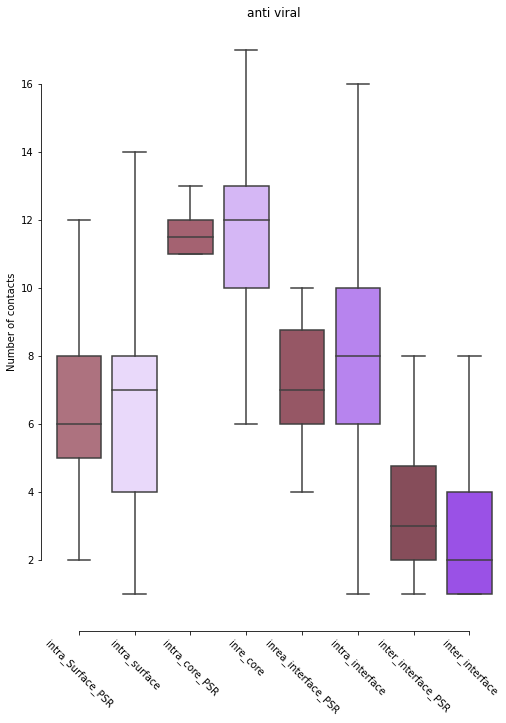

In [130]:
colors_union = ['#b7687a','#e9d4ff','#af576b','#d5adff','#a04c5f','#b773ff','#8f4455','#9938ff']


f = plt.figure(figsize=[8,11])
ax = sns.boxplot(x="type", y="number_intra_contact",data=df_anti_viral,showfliers = False,palette=colors_union,width=0.8)
#ax.get_legend().remove()
ax.set_title('anti viral') 
ax.set(xlabel='', ylabel='Number of contacts')
sns.despine(offset=10, trim=True)

ax.set_xticklabels(labels=['intra_Surface_PSR','intra_surface','intra_core_PSR','inre_core','inrea_interface_PSR','intra_interface','inter_interface_PSR','inter_interface'],
                   rotation = -45, size =10)
#plt.savefig('inter_intra.png')

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\intra_inter_PSR_ant_viral_all.pdf',transparent=True)


In [131]:
df = df_anti_viral

intra_surface_PSR = df[df['type'] == 'intra_surface_PSR']['number_intra_contact']
intra_surface_PSR

intra_surface = df[df['type'] == 'intra_surface']['number_intra_contact']
intra_surface

intra_core_PSR = df[df['type'] == 'intra_core_PSR']['number_intra_contact']
intra_core_PSR

intra_core = df[df['type'] == 'intra_core']['number_intra_contact']
intra_core

intra_interface_PSR = df[df['type'] == 'intra_interface_PSR']['number_intra_contact']
intra_interface_PSR

intra_interface = df[df['type'] == 'intra_interface']['number_intra_contact']
intra_interface

inter_interface_PSR = df[df['type'] == 'inter_interface_PSR']['number_intra_contact']
inter_interface_PSR

inter_interface = df[df['type'] == 'inter_interface']['number_intra_contact']
inter_interface

# intra surfae PSR , Intra surface 
print('intra surfae PSR/Intra surface')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_surface_PSR,intra_surface,use_continuity=True, alternative='less')
print(mannwhitneyu)

print('intra core PSR/Intra core')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_core_PSR,intra_core,use_continuity=True, alternative='less')
print(mannwhitneyu)

print('intra interface PSR/Intra interface')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_interface_PSR,intra_interface,use_continuity=True, alternative='less')
print(mannwhitneyu)

print('inter interface PSR/Intera interface')
mannwhitneyu = scipy.stats.mannwhitneyu(inter_interface_PSR,inter_interface,use_continuity=True, alternative='greater')
print(mannwhitneyu)

intra surfae PSR/Intra surface
MannwhitneyuResult(statistic=89804.0, pvalue=0.4169334119645753)
intra core PSR/Intra core
MannwhitneyuResult(statistic=7032.5, pvalue=0.3410801541001647)
intra interface PSR/Intra interface
MannwhitneyuResult(statistic=12608.0, pvalue=0.04641816409102479)
inter interface PSR/Intera interface
MannwhitneyuResult(statistic=19566.0, pvalue=0.007766446802285234)


In [132]:
pvals = [0.51,0.21,0.046]
cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals

(array([False, False, False]),
 array([0.51 , 0.315, 0.138]),
 0.016952427508441503,
 0.016666666666666666)

In [133]:
# non anti viral

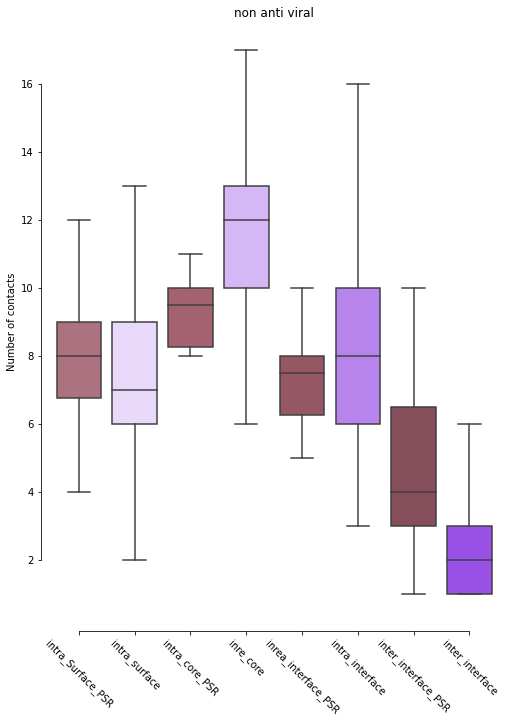

In [134]:
colors_union = ['#b7687a','#e9d4ff','#af576b','#d5adff','#a04c5f','#b773ff','#8f4455','#9938ff']


f = plt.figure(figsize=[8,11])
ax = sns.boxplot(x="type", y="number_intra_contact",data=df_non_anti_viral,showfliers = False,palette=colors_union,width=0.8)
#ax.get_legend().remove()
ax.set_title('non anti viral') 
ax.set(xlabel='', ylabel='Number of contacts')
sns.despine(offset=10, trim=True)

ax.set_xticklabels(labels=['intra_Surface_PSR','intra_surface','intra_core_PSR','inre_core','inrea_interface_PSR','intra_interface','inter_interface_PSR','inter_interface'],
                   rotation = -45, size =10)
#plt.savefig('inter_intra.png')

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\intra_inter_PSR_Non_anti_viral_all.pdf',transparent=True)


In [135]:
df = df_non_anti_viral

intra_surface_PSR = df[df['type'] == 'intra_surface_PSR']['number_intra_contact']
intra_surface_PSR

intra_surface = df[df['type'] == 'intra_surface']['number_intra_contact']
intra_surface

intra_core_PSR = df[df['type'] == 'intra_core_PSR']['number_intra_contact']
intra_core_PSR

intra_core = df[df['type'] == 'intra_core']['number_intra_contact']
intra_core

intra_interface_PSR = df[df['type'] == 'intra_interface_PSR']['number_intra_contact']
intra_interface_PSR

intra_interface = df[df['type'] == 'intra_interface']['number_intra_contact']
intra_interface

inter_interface_PSR = df[df['type'] == 'inter_interface_PSR']['number_intra_contact']
inter_interface_PSR

inter_interface = df[df['type'] == 'inter_interface']['number_intra_contact']
inter_interface

# intra surfae PSR , Intra surface 
print('intra surfae PSR/Intra surface')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_surface_PSR,intra_surface,use_continuity=True, alternative='less')
print(mannwhitneyu)

print('intra core PSR/Intra core')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_core_PSR,intra_core,use_continuity=True, alternative='less')
print(mannwhitneyu)

print('intra interface PSR/Intra interface')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_interface_PSR,intra_interface,use_continuity=True, alternative='less')
print(mannwhitneyu)

print('inter interface PSR/Intera interface')
mannwhitneyu = scipy.stats.mannwhitneyu(inter_interface_PSR,inter_interface,use_continuity=True, alternative='greater')
print(mannwhitneyu)

intra surfae PSR/Intra surface
MannwhitneyuResult(statistic=48427.0, pvalue=0.6015639436961613)
intra core PSR/Intra core
MannwhitneyuResult(statistic=2685.0, pvalue=0.005241634360037065)
intra interface PSR/Intra interface
MannwhitneyuResult(statistic=2598.5, pvalue=0.17056545467816098)
inter interface PSR/Intera interface
MannwhitneyuResult(statistic=4690.5, pvalue=0.002446324472053675)


In [136]:
pvals = [0.246,0.019,0.17]
cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals

(array([False, False, False]),
 array([0.246, 0.057, 0.246]),
 0.016952427508441503,
 0.016666666666666666)

In [137]:
# ALPHA

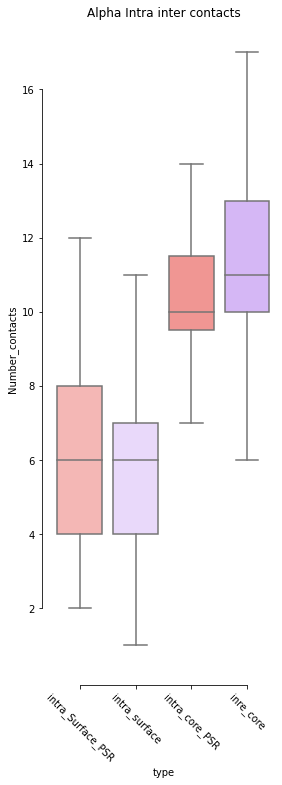

In [138]:
path_in = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\18_Viral_Non_EBD_PSG_Alpha\40_surface_core_interface_fix_union_by_uniprot_intra_contact_csu_fix_res_rate4site_with_PSR\\'

df = pd.read_csv(path_in+'Union_surface_core_PSR_Alpha.txt')

colors_union = ['#b7687a','#e9d4ff','#af576b','#d5adff']


f = plt.figure(figsize=[4,12])
ax = sns.boxplot(x="type", y="number_intra_contact",data=df,palette=colors_union,width=0.8,showfliers = False)
#ax.get_legend().remove()
ax.set_title('Alpha Intra inter contacts') 
ax.set(xlabel='type', ylabel='Number_contacts')
sns.despine(offset=10, trim=True)
ax.set_xticklabels(labels=['intra_Surface_PSR','intra_surface','intra_core_PSR','inre_core'],
                   rotation = -45, size =10)
#plt.savefig('inter_intra_onlu_alpha.png')

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\intra_inter_PSR_Alpha_all.pdf',transparent=True)


In [139]:
intra_surface_PSR = df[df['type'] == 'intra_surface_PSR']['number_intra_contact']
intra_surface_PSR

intra_surface = df[df['type'] == 'intra_surface']['number_intra_contact']
intra_surface

intra_core_PSR = df[df['type'] == 'intra_core_PSR']['number_intra_contact']
intra_core_PSR

intra_core = df[df['type'] == 'intra_core']['number_intra_contact']
intra_core

print('intra surfae PSR/Intra surface')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_surface_PSR,intra_surface,use_continuity=True, alternative='greater')
print(mannwhitneyu)

print('intra core PSR/Intra core')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_core_PSR,intra_core,use_continuity=True, alternative='less')
print(mannwhitneyu)

intra surfae PSR/Intra surface
MannwhitneyuResult(statistic=583984.5, pvalue=0.048076484027130634)
intra core PSR/Intra core
MannwhitneyuResult(statistic=50338.0, pvalue=0.07846661974631143)


In [140]:
pvals = [0.048076484027130634,0.07846661974631143]
cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals

(array([False, False]),
 array([0.07846662, 0.07846662]),
 0.025320565519103666,
 0.025)

# pie chrat EBD

In [20]:
from scipy.stats import fisher_exact

intrface = [0,87]
surface_core = [110, 20252]


print('##pvalue##')

# Viral_binding_EBD_experimental/Proteom
print('intrface/surface_core')
data = [intrface,surface_core]
oddsratio, pvalue = fisher_exact(data,alternative='less')
print(pvalue)

##pvalue##
intrface/surface_core
0.6248466475399391


In [7]:
# pie chrat Viral non EBD

In [24]:
from scipy.stats import fisher_exact

intrface = [36,1828]
surface_core = [105, 10709]


print('##pvalue##')

# Viral_binding_EBD_experimental/Proteom
print('intrface/surface_core')
data = [intrface,surface_core]
oddsratio, pvalue = fisher_exact(data,alternative='greater')
print(pvalue)

##pvalue##
intrface/surface_core
0.0004963078431927318


# EBD vs Viral Non EBD intra contacs

[Text(0, 0, 'intra_Surface_PSR'),
 Text(1, 0, 'intra_surface'),
 Text(2, 0, 'intra_core_PSR'),
 Text(3, 0, 'inre_core'),
 Text(4, 0, 'intra_interface_PSR'),
 Text(5, 0, 'intra_interface'),
 Text(6, 0, 'inter_interface_PSR'),
 Text(7, 0, 'inter_interface'),
 Text(8, 0, 'intra_inter_interface_PSR'),
 Text(9, 0, 'intra_inter_interface')]

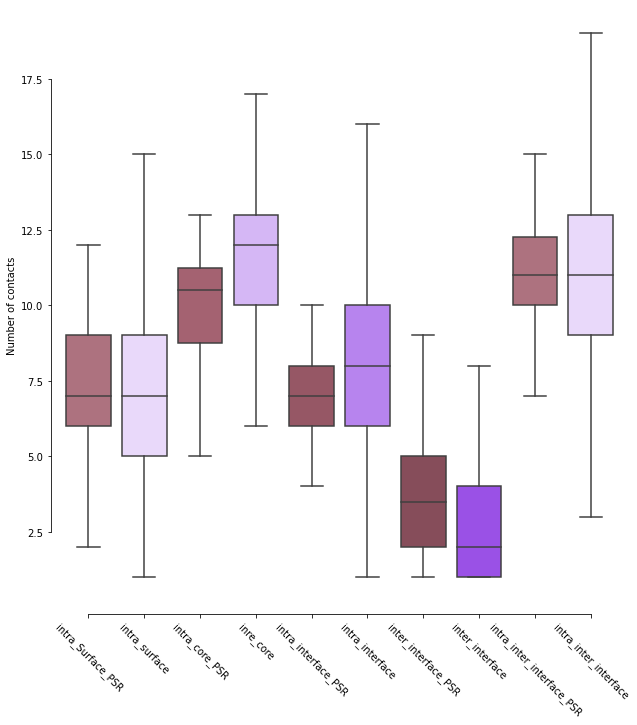

In [8]:
path_in = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\18_Viral_Non_EBD_PSG_Update\41_union_new_old_viral_non_EBD_intraction\\'

df = pd.read_csv(path_in+'union_All_14_11.txt')

colors_union = ['#b7687a','#e9d4ff','#af576b','#d5adff','#a04c5f','#b773ff','#8f4455','#9938ff']


f = plt.figure(figsize=[10,11])
ax = sns.boxplot(x="type", y="number_intra_contact",data=df,showfliers = False,palette=colors_union,width=0.8)#,notch=True)
#ax.get_legend().remove()
#ax.set_title('Intra inter contacts') 
ax.set(xlabel='', ylabel='Number of contacts')
sns.despine(offset=10, trim=True)

ax.set_xticklabels(labels=['intra_Surface_PSR','intra_surface','intra_core_PSR','inre_core','intra_interface_PSR','intra_interface','inter_interface_PSR','inter_interface','intra_inter_interface_PSR','intra_inter_interface'],
                   rotation = -45, size =10)
#plt.savefig('inter_intra.png')

In [9]:
intra_surface_PSR = df[df['type'] == 'intra_surface_PSR']['number_intra_contact']


intra_surface = df[df['type'] == 'intra_surface']['number_intra_contact']

      
intra_core_PSR = df[df['type'] == 'intra_core_PSR']['number_intra_contact']


intra_core = df[df['type'] == 'intra_core']['number_intra_contact']


intra_interface_PSR = df[df['type'] == 'intra_interface_PSR']['number_intra_contact']


intra_interface = df[df['type'] == 'intra_interface']['number_intra_contact']


inter_interface_PSR = df[df['type'] == 'inter_interface_PSR']['number_intra_contact']

inter_interface = df[df['type'] == 'inter_interface']['number_intra_contact']


inter_intra_interface_PSR = df[df['type'] == 'inter_intra_interface_PSR']['number_intra_contact']

inter_intra_interface = df[df['type'] == 'inter_intra_interface']['number_intra_contact']


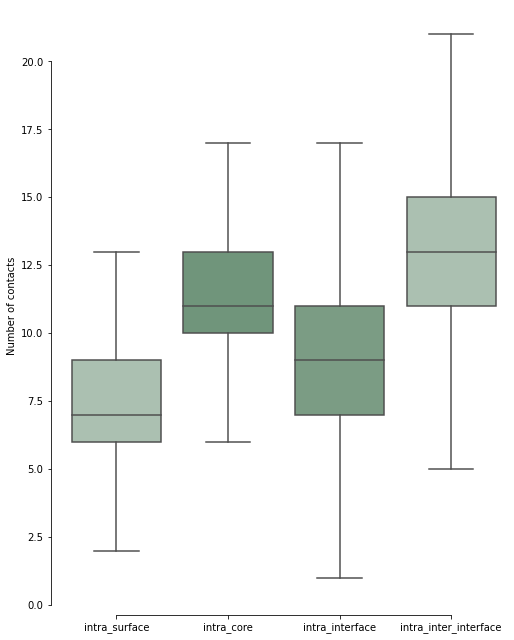

In [10]:
path_in = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\20_intra_contacts_EBD\8_intra_surface_core_interface\\'

df_ebd = pd.read_csv(path_in+'Union_all_contact_EBD.txt')

colors_union = ['#a7c4b0','#6a9b79','#75a282']


f = plt.figure(figsize=[8,11])
ax = sns.boxplot(x="type", y="number_intra_contact",data=df_ebd,showfliers = False,palette=colors_union,width=0.8)#,notch=True)
#ax.get_legend().remove()
#ax.set_title('Intra inter contacts') 
ax.set(xlabel='', ylabel='Number of contacts')
sns.despine(offset=10, trim=True)

#ax.set_xticklabels(labels=['intra_Surface_PSR','intra_surface','intra_core_PSR','inre_core','inrea_interface_PSR','intra_interface','inter_interface_PSR','inter_interface'],
                   #rotation = -45, size =10)
#plt.savefig('inter_intra.png')

In [11]:
intra_surface_ebd = df_ebd[df_ebd['type'] == 'intra_surface']['number_intra_contact']


intra_core_ebd = df_ebd[df_ebd['type'] == 'intra_core']['number_intra_contact']

intra_interface_ebd = df_ebd[df_ebd['type'] == 'intra_interface']['number_intra_contact']


inter_inter_interface_ebd = df_ebd[df_ebd['type'] == 'intra_inter_interface']['number_intra_contact']


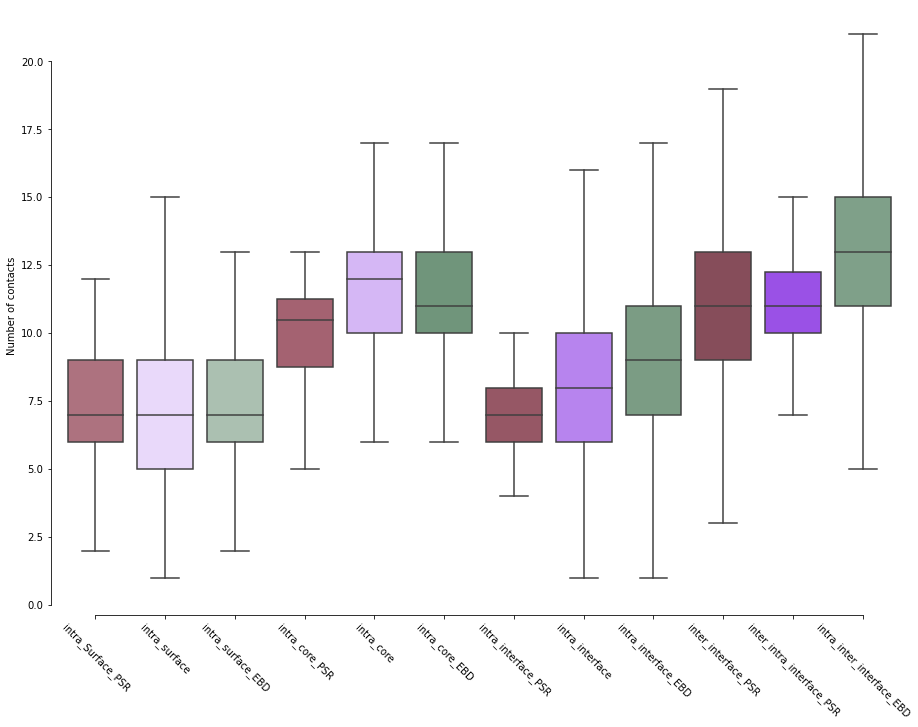

In [22]:
path_in = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\20_intra_contacts_EBD\8_intra_surface_core_interface\\'

df = pd.read_csv(path_in+'Union_all_contacs_EBD_Viral_Non_EBD.txt')

df = df[df.type != 'inter_interface_PSR']
df = df[df.type != 'inter_interface']

colors_union = ['#b7687a','#e9d4ff','#a7c4b0','#af576b','#d5adff','#6a9b79','#a04c5f','#b773ff','#75a282','#8f4455','#9938ff','#79a587']


f = plt.figure(figsize=[15,11])
ax = sns.boxplot(x="type", y="number_intra_contact",data=df,showfliers =False,palette=colors_union,width=0.8,
                order=['intra_surface_PSR','intra_surface','intra_surface_EBD',
                       'intra_core_PSR','intra_core','intra_core_EBD',
                       'intra_interface_PSR','intra_interface','intra_interface_EBD',
                       'inter_intra_interface','inter_intra_interface_PSR','intra_inter_interface_EBD'])

#ax.get_legend().remove()
#ax.set_title('Intra inter contacts') 
ax.set(xlabel='', ylabel='Number of contacts')
sns.despine(offset=10, trim=True)

ax.set_xticklabels(labels=['intra_Surface_PSR','intra_surface','intra_surface_EBD',
                           'intra_core_PSR','intra_core','intra_core_EBD',
                           'intra_interface_PSR','intra_interface','intra_interface_EBD',
                           'inter_interface_PSR','inter_intra_interface_PSR','intra_inter_interface_EBD'],rotation = -45, size =10)

plt.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\Union_all_contacs_EBD_Viral_Non_EBD.pdf',transparent=True)


In [14]:
intra_surface_PSR = df[df['type'] == 'intra_surface_PSR']['number_intra_contact']


intra_surface = df[df['type'] == 'intra_surface']['number_intra_contact']
print(intra_surface.median())
print(intra_surface.mean())

      
intra_core_PSR = df[df['type'] == 'intra_core_PSR']['number_intra_contact']


intra_core = df[df['type'] == 'intra_core']['number_intra_contact']


intra_interface_PSR = df[df['type'] == 'intra_interface_PSR']['number_intra_contact']


intra_interface = df[df['type'] == 'intra_interface']['number_intra_contact']


inter_intra_interface_PSR = df[df['type'] == 'inter_intra_interface_PSR']['number_intra_contact']

inter_intra_interface = df[df['type'] == 'inter_intra_interface']['number_intra_contact']


intra_surface_ebd = df[df['type'] == 'intra_surface_EBD']['number_intra_contact']
print(intra_surface_ebd.median())
print(intra_surface_ebd.mean())

intra_core_ebd = df[df['type'] == 'intra_core_EBD']['number_intra_contact']


intra_interface_ebd = df[df['type'] == 'intra_interface_EBD']['number_intra_contact']


inter_inter_interface_ebd = df[df['type'] == 'intra_inter_interface_EBD']['number_intra_contact']


7.0
6.827468978412375
7.0
7.436778068689358


In [15]:
# surface 
mannwhitneyu = scipy.stats.mannwhitneyu(intra_surface_ebd,intra_surface,use_continuity=True, alternative='greater')
mannwhitneyu[1]

1.0895680648789377e-34

In [16]:
# CORE
mannwhitneyu = scipy.stats.mannwhitneyu(intra_core_ebd,intra_core,use_continuity=True, alternative='less')
mannwhitneyu[1]

0.0009093724762921399

In [17]:
#intra interface
mannwhitneyu = scipy.stats.mannwhitneyu(intra_interface_ebd,intra_interface,use_continuity=True, alternative='greater')
mannwhitneyu[1]

1.216938058366383e-24

In [18]:
#intra inter interface
mannwhitneyu = scipy.stats.mannwhitneyu(inter_inter_interface_ebd,inter_intra_interface,use_continuity=True, alternative='greater')
mannwhitneyu[1]

1.475121713265732e-151

In [19]:
#intra inter interface EBD vd core ebd
mannwhitneyu = scipy.stats.mannwhitneyu(inter_inter_interface_ebd,intra_core_ebd,use_continuity=True, alternative='greater')
mannwhitneyu[1]

8.485120554227268e-110

In [20]:
#intra inter interface intra cotr
mannwhitneyu = scipy.stats.mannwhitneyu(inter_intra_interface,intra_core,use_continuity=True, alternative='less')
mannwhitneyu[1]

3.886671890298039e-61

In [21]:
pvals = [1.0895680648789377e-34,0.0009093724762921399,1.216938058366383e-24,1.475121713265732e-151,8.485120554227268e-110,3.886671890298039e-61]
cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals

(array([ True,  True,  True,  True,  True,  True]),
 array([1.63435210e-034, 9.09372476e-004, 1.46032567e-024, 8.85073028e-151,
        2.54553617e-109, 7.77334378e-061]),
 0.008512444610847103,
 0.008333333333333333)

# Union all VIRAL NON PSG WITH UPDATE AND ALPHA 

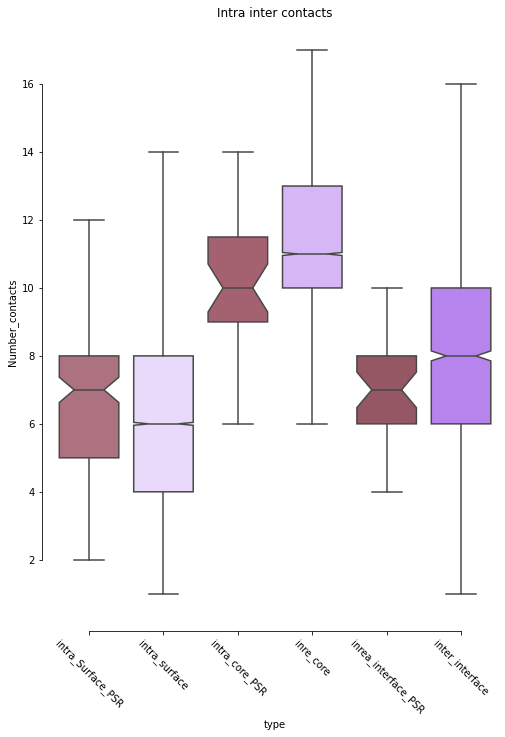

In [52]:
path_in = r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\18_Viral_Non_EBD_PSG_Alpha\40_surface_core_interface_fix_union_by_uniprot_intra_contact_csu_fix_res_rate4site_with_PSR\\'

df = pd.read_csv(path_in+'Union_all_data_PSR_with_update_and_Alpha.txt')
df = df[df.type != 'inter_interface']
df = df[df.type != 'inter_interface_PSR']

colors_union = ['#b7687a','#e9d4ff','#af576b','#d5adff','#a04c5f','#b773ff','#8f4455','#9938ff']


f = plt.figure(figsize=[8,11])
ax = sns.boxplot(x="type", y="number_intra_contact",data=df,showfliers = False,palette=colors_union,width=0.8,notch=True)
#ax.get_legend().remove()
ax.set_title('Intra inter contacts') 
ax.set(xlabel='type', ylabel='Number_contacts')
sns.despine(offset=10, trim=True)
ax.set_xticklabels(labels=['intra_Surface_PSR','intra_surface','intra_core_PSR','inre_core','inrea_interface_PSR','inter_interface'],
                   rotation = -45, size =10)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\intra_inter_PSR_union_Alpha_PDB_all.pdf',transparent=True)


In [50]:
intra_surface_PSR = df[df['type'] == 'intra_surface_PSR']['number_intra_contact']
intra_surface_PSR

intra_surface = df[df['type'] == 'intra_surface']['number_intra_contact']
intra_surface

intra_core_PSR = df[df['type'] == 'intra_core_PSR']['number_intra_contact']
intra_core_PSR

intra_core = df[df['type'] == 'intra_core']['number_intra_contact']
intra_core

intra_interface_PSR = df[df['type'] == 'intra_interface_PSR']['number_intra_contact']
intra_interface_PSR

intra_interface = df[df['type'] == 'intra_interface']['number_intra_contact']
intra_interface

# intra surfae PSR , Intra surface 
print('intra surfae PSR/Intra surface')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_surface_PSR,intra_surface,use_continuity=True, alternative='greater')
print(mannwhitneyu)

print('intra core PSR/Intra core')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_core_PSR,intra_core,use_continuity=True, alternative='less')
print(mannwhitneyu)

print('intra interface PSR/Intra interface')
mannwhitneyu = scipy.stats.mannwhitneyu(intra_interface_PSR,intra_interface,use_continuity=True, alternative='less')
print(mannwhitneyu)


intra surfae PSR/Intra surface
MannwhitneyuResult(statistic=1978361.0, pvalue=0.00046885522948480926)
intra core PSR/Intra core
MannwhitneyuResult(statistic=132052.5, pvalue=0.007904864370799758)
intra interface PSR/Intra interface
MannwhitneyuResult(statistic=26829.0, pvalue=0.02779720305676924)


In [51]:
pvals = [0.00046885522948480926,0.007904864370799758,0.02779720305676924]
cors_pvals=sm.multipletests(pvals=pvals,method='fdr_bh',alpha=0.05)
cors_pvals

(array([ True,  True,  True]),
 array([0.00140657, 0.0118573 , 0.0277972 ]),
 0.016952427508441503,
 0.016666666666666666)

# TPM PSG

In [ ]:
# avg

In [86]:
df= pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')
df

,Protein,Uniprot_id,Concatenation,Pfam_ID,Start_End_domain,EBD_domain,Bind_pathogen_elm,Bind_human_elm,Hvidb_Experimentally_verified_complex_structures,Hvidb_Human_virus_PPI_data,...,Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,Viral_non_EBD_interactions,Protein_with_EBD_and_non_EBD_domain,Average_rate,Protein_interactions_by_domain_motif,Multi_virus_EBD_domain_motif,Percentage_expressed_tissues,Percentage_TPM_tissues,Gene_essentially,orthologs_ensembl_78
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000167359,ENSP00000369559,Q9H343,0,PF13853,33-312,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.002326,0,0
ENSG00000176302,ENSP00000314806,Q6PIV2,0,PF00250,172-262,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.081395,0,1
ENSG00000138768,ENSP00000264904,O60763,1,PF04869;PF04871;PF18770,344-628;784-954;269-329,0,0,0,0,1,...,0,1,0,0.734774,NaN,0.0,NaN,44.465116,0,1
ENSG00000281935,ENSP00000488646,A0A0J9YY17,0,PF12780;PF12774;PF03028;PF12775;PF12781;PF1819...,1498-1757;519-845;2598-2711;1141-1322;2131-235...,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000280529,ENSP00000487182,A0A0G2JRY5,0,PF05236;PF07531,206-454;1-55,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000276253,ENSP00000481534,A0A0G2JNJ9,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000288623,ENSP00000502390,A0A6Q8PGS0,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000284526,ENSP00000491046,A0A1W2PNU3,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,5.516279,0,0


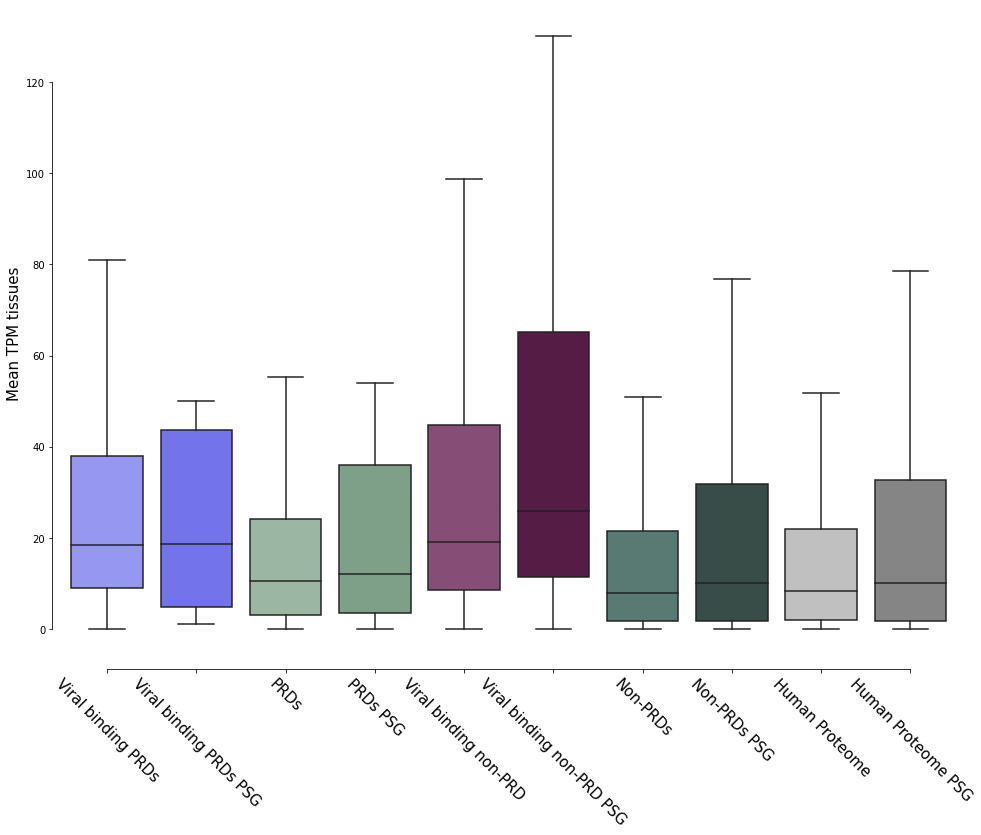

In [87]:
# final meta_data
# with no uniprot

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'
Viral_non_EBD_interactions

EBD_domain = df[df['EBD_domain']==1]['Percentage_TPM_tissues'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain

non_EBD_domain = df[df['EBD_domain']==0]['Percentage_TPM_tissues'].to_frame()
non_EBD_domain['type'] = 'Non_EBD_domain'
non_EBD_domain

proteome =  df['Percentage_TPM_tissues'].to_frame()
proteome['type'] = 'Proteome'
proteome

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Percentage_TPM_tissues'].to_frame() 
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'

EBD_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
EBD_PSG['type'] = 'EBD_PSG'

Non_EBD_PSG = df[(df['EBD_domain']==0)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Non_EBD_PSG['type'] = 'Non_EBD_PSG'

proteome_PSG =  df[df['PSG_dn_ds']==1]['Percentage_TPM_tissues'].to_frame()
proteome_PSG['type'] = 'Proteome_PSG'

Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['PSG_dn_ds']==1))]['Percentage_TPM_tissues'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'



df_merege =  bind_virus_elm_hvidb_only_EBD.append([
        
                                                                              bind_virus_elm_hvidb_only_EBD_PSG,
                                                                              EBD_domain,
                                                                              EBD_PSG,
                                                                             Viral_non_EBD_interactions,
                                                                            Viral_non_EBD_interactions_PSG,
                                                                             non_EBD_domain,
                                                                              Non_EBD_PSG,
                                                                              proteome,
                                                                             proteome_PSG],ignore_index=True)

list_colors =['#8688ff','#5f61ff','#98baa2','#79a686','#8f447a','#5e1349','#547f76','#35504a','#C0C0C0','#858585']

df_merege = df_merege.dropna()
df_merege

f = plt.figure(figsize=[16,12])
ax = sns.boxplot(x="type", y="Percentage_TPM_tissues",data=df_merege,showfliers = False,palette=list_colors)
#ax.set(ylim=(0,100))
plt.ylabel('Mean TPM tissues', fontsize = 15)
plt.xlabel('')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels([
                    'Viral binding PRDs','Viral binding PRDs PSG',
                    'PRDs','PRDs PSG',
                    'Viral binding non-PRD','Viral binding non-PRD PSG',
                    'Non-PRDs','Non-PRDs PSG',
                    'Human Proteome','Human Proteome PSG'],rotation = -45, size =15)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\tpm_psg_AVG.pdf',transparent=True)


In [85]:
a = bind_virus_elm_hvidb_only_EBD['Percentage_TPM_tissues'].mean()
print('Viral binding PRDs',a)

a = bind_virus_elm_hvidb_only_EBD_PSG['Percentage_TPM_tissues'].mean()
print('Viral binding PRDs PSG',a)

a = EBD_domain['Percentage_TPM_tissues'].mean()
print('PRDs',a)

a = EBD_PSG['Percentage_TPM_tissues'].mean()
print('PRDs PSG',a)


a = Viral_non_EBD_interactions['Percentage_TPM_tissues'].mean()
print('Viral binding non-PRD',a)

a = Viral_non_EBD_interactions_PSG['Percentage_TPM_tissues'].mean()
print('Viral binding non-PRD PSG',a)

a = non_EBD_domain['Percentage_TPM_tissues'].mean()
print('Non-PRDs',a)

a = Non_EBD_PSG['Percentage_TPM_tissues'].mean()
print('Non-PRDs PSG',a)

a = proteome['Percentage_TPM_tissues'].mean()
print('Human Proteome',a)

a = proteome_PSG['Percentage_TPM_tissues'].mean()
print('Human Proteome PSG',a)

Viral binding PRDs 44.99412998661796
Viral binding PRDs PSG 33.075083056478405
PRDs 29.005849039469695
PRDs PSG 24.09430633520449
Viral binding non-PRD 99.96052503106704
Viral binding non-PRD PSG 77.0678911205074
Non-PRDs 42.72179437764089
Non-PRDs PSG 41.96763501506609
Human Proteome 40.72490471834963
Human Proteome PSG 40.39694855532066


In [88]:
a = bind_virus_elm_hvidb_only_EBD['Percentage_TPM_tissues'].median()
print('Viral binding PRDs',a)

a = bind_virus_elm_hvidb_only_EBD_PSG['Percentage_TPM_tissues'].median()
print('Viral binding PRDs PSG',a)

a = EBD_domain['Percentage_TPM_tissues'].median()
print('PRDs',a)

a = EBD_PSG['Percentage_TPM_tissues'].median()
print('PRDs PSG',a)


a = Viral_non_EBD_interactions['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD',a)

a = Viral_non_EBD_interactions_PSG['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD PSG',a)

a = non_EBD_domain['Percentage_TPM_tissues'].median()
print('Non-PRDs',a)

a = Non_EBD_PSG['Percentage_TPM_tissues'].median()
print('Non-PRDs PSG',a)

a = proteome['Percentage_TPM_tissues'].median()
print('Human Proteome',a)

a = proteome_PSG['Percentage_TPM_tissues'].median()
print('Human Proteome PSG',a)

Viral binding PRDs 18.537209302325582
Viral binding PRDs PSG 18.68953488372093
PRDs 10.534883720930232
PRDs PSG 12.22325581395349
Viral binding non-PRD 19.058139534883722
Viral binding non-PRD PSG 25.896511627906975
Non-PRDs 7.925581395348837
Non-PRDs PSG 10.1
Human Proteome 8.309302325581395
Human Proteome PSG 10.210465116279071


In [ ]:
# median

In [54]:
df_meidan_tpm = pd.read_csv(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\15_expressed_tissues\rna_tissue_hpa_median.txt',index_col='gene_id')

In [55]:
df_meidan_tpm

,Percentage_TPM_tissues
gene_id,
ENSG00000000003,26.4
ENSG00000000005,0.2
ENSG00000000419,46.0
ENSG00000000457,9.2
ENSG00000000460,2.5
...,...
ENSG00000285471,0.0
ENSG00000285472,0.0
ENSG00000285480,0.3


In [57]:
df.update(df_meidan_tpm)
df

,Protein,Uniprot_id,Concatenation,Pfam_ID,Start_End_domain,EBD_domain,Bind_pathogen_elm,Bind_human_elm,Hvidb_Experimentally_verified_complex_structures,Hvidb_Human_virus_PPI_data,...,Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,Viral_non_EBD_interactions,Protein_with_EBD_and_non_EBD_domain,Average_rate,Protein_interactions_by_domain_motif,Multi_virus_EBD_domain_motif,Percentage_expressed_tissues,Percentage_TPM_tissues,Gene_essentially,orthologs_ensembl_78
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000167359,ENSP00000369559,Q9H343,0,PF13853,33-312,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.0,0,0
ENSG00000176302,ENSP00000314806,Q6PIV2,0,PF00250,172-262,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.0,0,1
ENSG00000138768,ENSP00000264904,O60763,1,PF04869;PF04871;PF18770,344-628;784-954;269-329,0,0,0,0,1,...,0,1,0,0.734774,NaN,0.0,NaN,42.4,0,1
ENSG00000281935,ENSP00000488646,A0A0J9YY17,0,PF12780;PF12774;PF03028;PF12775;PF12781;PF1819...,1498-1757;519-845;2598-2711;1141-1322;2131-235...,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000280529,ENSP00000487182,A0A0G2JRY5,0,PF05236;PF07531,206-454;1-55,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000276253,ENSP00000481534,A0A0G2JNJ9,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000288623,ENSP00000502390,A0A6Q8PGS0,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000284526,ENSP00000491046,A0A1W2PNU3,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,5.6,0,0


In [61]:
df.loc['ENSG00000139154']['Percentage_TPM_tissues']

23.5

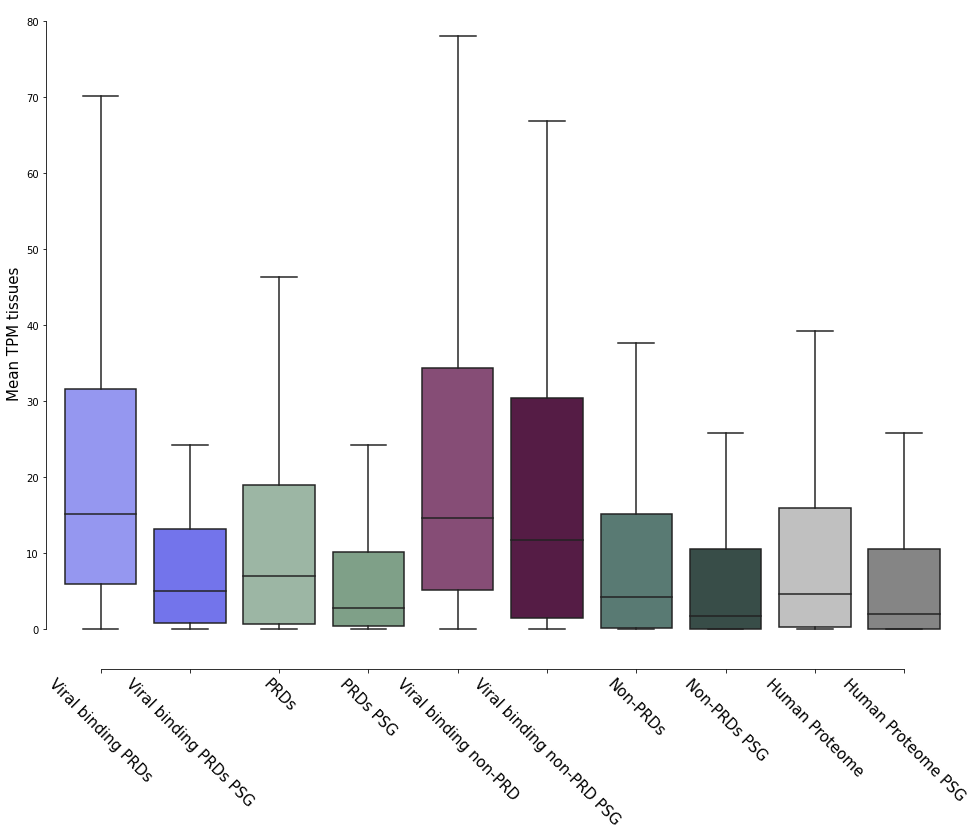

In [63]:
# final meta_data
# with no uniprot

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'
Viral_non_EBD_interactions

EBD_domain = df[df['EBD_domain']==1]['Percentage_TPM_tissues'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain

non_EBD_domain = df[df['EBD_domain']==0]['Percentage_TPM_tissues'].to_frame()
non_EBD_domain['type'] = 'Non_EBD_domain'
non_EBD_domain

proteome =  df['Percentage_TPM_tissues'].to_frame()
proteome['type'] = 'Proteome'
proteome

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Percentage_TPM_tissues'].to_frame() 
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'

EBD_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
EBD_PSG['type'] = 'EBD_PSG'

Non_EBD_PSG = df[(df['EBD_domain']==0)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Non_EBD_PSG['type'] = 'Non_EBD_PSG'

proteome_PSG =  df[df['PSG_dn_ds']==1]['Percentage_TPM_tissues'].to_frame()
proteome_PSG['type'] = 'Proteome_PSG'

Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['PSG_dn_ds']==1))]['Percentage_TPM_tissues'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'



df_merege =  bind_virus_elm_hvidb_only_EBD.append([
        
                                                                              bind_virus_elm_hvidb_only_EBD_PSG,
                                                                              EBD_domain,
                                                                              EBD_PSG,
                                                                             Viral_non_EBD_interactions,
                                                                            Viral_non_EBD_interactions_PSG,
                                                                             non_EBD_domain,
                                                                              Non_EBD_PSG,
                                                                              proteome,
                                                                             proteome_PSG],ignore_index=True)

list_colors =['#8688ff','#5f61ff','#98baa2','#79a686','#8f447a','#5e1349','#547f76','#35504a','#C0C0C0','#858585']

df_merege = df_merege.dropna()
df_merege

f = plt.figure(figsize=[16,12])
ax = sns.boxplot(x="type", y="Percentage_TPM_tissues",data=df_merege,showfliers = False,palette=list_colors)
#ax.set(ylim=(0,100))
plt.ylabel('Mean TPM tissues', fontsize = 15)
plt.xlabel('')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels([
                    'Viral binding PRDs','Viral binding PRDs PSG',
                    'PRDs','PRDs PSG',
                    'Viral binding non-PRD','Viral binding non-PRD PSG',
                    'Non-PRDs','Non-PRDs PSG',
                    'Human Proteome','Human Proteome PSG'],rotation = -45, size =15)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\tpm_psg_1.pdf',transparent=True)


In [81]:
a = bind_virus_elm_hvidb_only_EBD['Percentage_TPM_tissues'].median()
print('Viral binding PRDs',a)

a = bind_virus_elm_hvidb_only_EBD_PSG['Percentage_TPM_tissues'].median()
print('Viral binding PRDs PSG',a)

a = EBD_domain['Percentage_TPM_tissues'].median()
print('PRDs',a)

a = EBD_PSG['Percentage_TPM_tissues'].median()
print('PRDs PSG',a)


a = Viral_non_EBD_interactions['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD',a)

a = Viral_non_EBD_interactions_PSG['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD PSG',a)

a = non_EBD_domain['Percentage_TPM_tissues'].median()
print('Non-PRDs',a)

a = Non_EBD_PSG['Percentage_TPM_tissues'].median()
print('Non-PRDs PSG',a)

a = proteome['Percentage_TPM_tissues'].median()
print('Human Proteome',a)

a = proteome_PSG['Percentage_TPM_tissues'].median()
print('Human Proteome PSG',a)

Viral binding PRDs 15.149999999999999
Viral binding PRDs PSG 5.05
PRDs 7.0
PRDs PSG 2.8
Viral binding non-PRD 14.6
Viral binding non-PRD PSG 11.8
Non-PRDs 4.2
Non-PRDs PSG 1.7
Human Proteome 4.6
Human Proteome PSG 1.95


In [89]:
# variance

In [99]:
df= pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

In [100]:
df_variance_tpm = pd.read_csv(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\15_expressed_tissues\rna_tissue_hpa_variance.txt',index_col='gene_id')

In [101]:
df_variance_tpm

,Percentage_TPM_tissues
gene_id,
ENSG00000000003,707.043732
ENSG00000000005,27.430520
ENSG00000000419,281.141595
ENSG00000000457,15.446932
ENSG00000000460,20.528538
...,...
ENSG00000285471,0.082171
ENSG00000285472,1.640930
ENSG00000285480,0.959280


In [102]:
df.update(df_variance_tpm)
df

,Protein,Uniprot_id,Concatenation,Pfam_ID,Start_End_domain,EBD_domain,Bind_pathogen_elm,Bind_human_elm,Hvidb_Experimentally_verified_complex_structures,Hvidb_Human_virus_PPI_data,...,Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60,Viral_non_EBD_interactions,Protein_with_EBD_and_non_EBD_domain,Average_rate,Protein_interactions_by_domain_motif,Multi_virus_EBD_domain_motif,Percentage_expressed_tissues,Percentage_TPM_tissues,Gene_essentially,orthologs_ensembl_78
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000167359,ENSP00000369559,Q9H343,0,PF13853,33-312,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.000233,0,0
ENSG00000176302,ENSP00000314806,Q6PIV2,0,PF00250,172-262,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,0.223455,0,1
ENSG00000138768,ENSP00000264904,O60763,1,PF04869;PF04871;PF18770,344-628;784-954;269-329,0,0,0,0,1,...,0,1,0,0.734774,NaN,0.0,NaN,390.688040,0,1
ENSG00000281935,ENSP00000488646,A0A0J9YY17,0,PF12780;PF12774;PF03028;PF12775;PF12781;PF1819...,1498-1757;519-845;2598-2711;1141-1322;2131-235...,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000280529,ENSP00000487182,A0A0G2JRY5,0,PF05236;PF07531,206-454;1-55,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000276253,ENSP00000481534,A0A0G2JNJ9,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000288623,ENSP00000502390,A0A6Q8PGS0,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,NaN,0,0
ENSG00000284526,ENSP00000491046,A0A1W2PNU3,0,NaN,NaN,0,0,0,0,0,...,0,0,0,NaN,NaN,0.0,NaN,19.321395,0,0


In [104]:
df.loc['ENSG00000000003']

Protein                                                             ENSP00000362111
Uniprot_id                                                                   O43657
Concatenation                                                                     0
Pfam_ID                                                                     PF00335
Start_End_domain                                                             17-236
EBD_domain                                                                        0
Bind_pathogen_elm                                                                 0
Bind_human_elm                                                                    0
Hvidb_Experimentally_verified_complex_structures                                  0
Hvidb_Human_virus_PPI_data                                                        0
PPI_string                                                                    225.0
PSG_dn_ds                                                                   

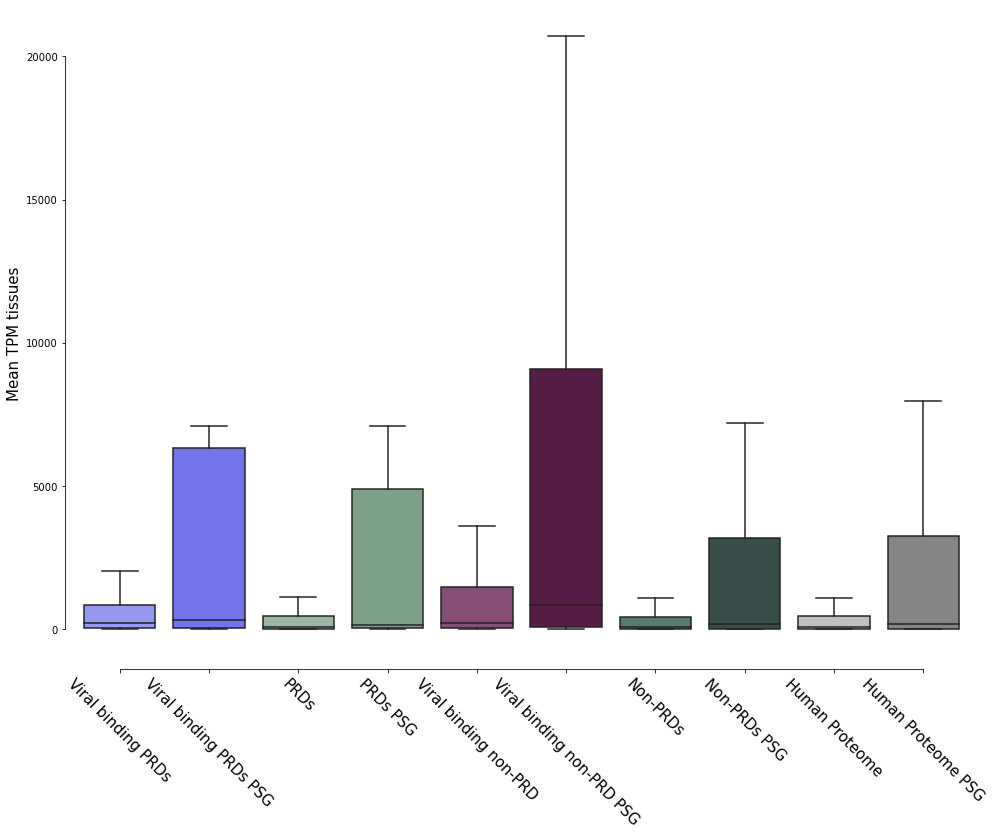

In [105]:
# final meta_data
# with no uniprot

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'
Viral_non_EBD_interactions

EBD_domain = df[df['EBD_domain']==1]['Percentage_TPM_tissues'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain

non_EBD_domain = df[df['EBD_domain']==0]['Percentage_TPM_tissues'].to_frame()
non_EBD_domain['type'] = 'Non_EBD_domain'
non_EBD_domain

proteome =  df['Percentage_TPM_tissues'].to_frame()
proteome['type'] = 'Proteome'
proteome

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Percentage_TPM_tissues'].to_frame() 
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'

EBD_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
EBD_PSG['type'] = 'EBD_PSG'

Non_EBD_PSG = df[(df['EBD_domain']==0)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Non_EBD_PSG['type'] = 'Non_EBD_PSG'

proteome_PSG =  df[df['PSG_dn_ds']==1]['Percentage_TPM_tissues'].to_frame()
proteome_PSG['type'] = 'Proteome_PSG'

Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['PSG_dn_ds']==1))]['Percentage_TPM_tissues'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'



df_merege =  bind_virus_elm_hvidb_only_EBD.append([
        
                                                                              bind_virus_elm_hvidb_only_EBD_PSG,
                                                                              EBD_domain,
                                                                              EBD_PSG,
                                                                             Viral_non_EBD_interactions,
                                                                            Viral_non_EBD_interactions_PSG,
                                                                             non_EBD_domain,
                                                                              Non_EBD_PSG,
                                                                              proteome,
                                                                             proteome_PSG],ignore_index=True)

list_colors =['#8688ff','#5f61ff','#98baa2','#79a686','#8f447a','#5e1349','#547f76','#35504a','#C0C0C0','#858585']

df_merege = df_merege.dropna()
df_merege

f = plt.figure(figsize=[16,12])
ax = sns.boxplot(x="type", y="Percentage_TPM_tissues",data=df_merege,showfliers = False,palette=list_colors)
#ax.set(ylim=(0,100))
plt.ylabel('Mean TPM tissues', fontsize = 15)
plt.xlabel('')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels([
                    'Viral binding PRDs','Viral binding PRDs PSG',
                    'PRDs','PRDs PSG',
                    'Viral binding non-PRD','Viral binding non-PRD PSG',
                    'Non-PRDs','Non-PRDs PSG',
                    'Human Proteome','Human Proteome PSG'],rotation = -45, size =15)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\tpm_psg_variance.pdf',transparent=True)


In [106]:
a = bind_virus_elm_hvidb_only_EBD['Percentage_TPM_tissues'].median()
print('Viral binding PRDs',a)

a = bind_virus_elm_hvidb_only_EBD_PSG['Percentage_TPM_tissues'].median()
print('Viral binding PRDs PSG',a)

a = EBD_domain['Percentage_TPM_tissues'].median()
print('PRDs',a)

a = EBD_PSG['Percentage_TPM_tissues'].median()
print('PRDs PSG',a)


a = Viral_non_EBD_interactions['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD',a)

a = Viral_non_EBD_interactions_PSG['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD PSG',a)

a = non_EBD_domain['Percentage_TPM_tissues'].median()
print('Non-PRDs',a)

a = Non_EBD_PSG['Percentage_TPM_tissues'].median()
print('Non-PRDs PSG',a)

a = proteome['Percentage_TPM_tissues'].median()
print('Human Proteome',a)

a = proteome_PSG['Percentage_TPM_tissues'].median()
print('Human Proteome PSG',a)

Viral binding PRDs 208.86634551495018
Viral binding PRDs PSG 323.5204429678848
PRDs 95.3882392026578
PRDs PSG 146.3738759689923
Viral binding non-PRD 212.49712070874864
Viral binding non-PRD PSG 844.46284606866
Non-PRDs 69.78941860465116
Non-PRDs PSG 171.44928017718715
Human Proteome 74.45778516057585
Human Proteome PSG 167.91293466223698


In [107]:
# max minus median

In [119]:
df= pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

df_max_minus_medain_tpm = pd.read_csv(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\15_expressed_tissues\rna_tissue_hpa_max_minus_median.txt',index_col='gene_id')

df.update(df_max_minus_medain_tpm)

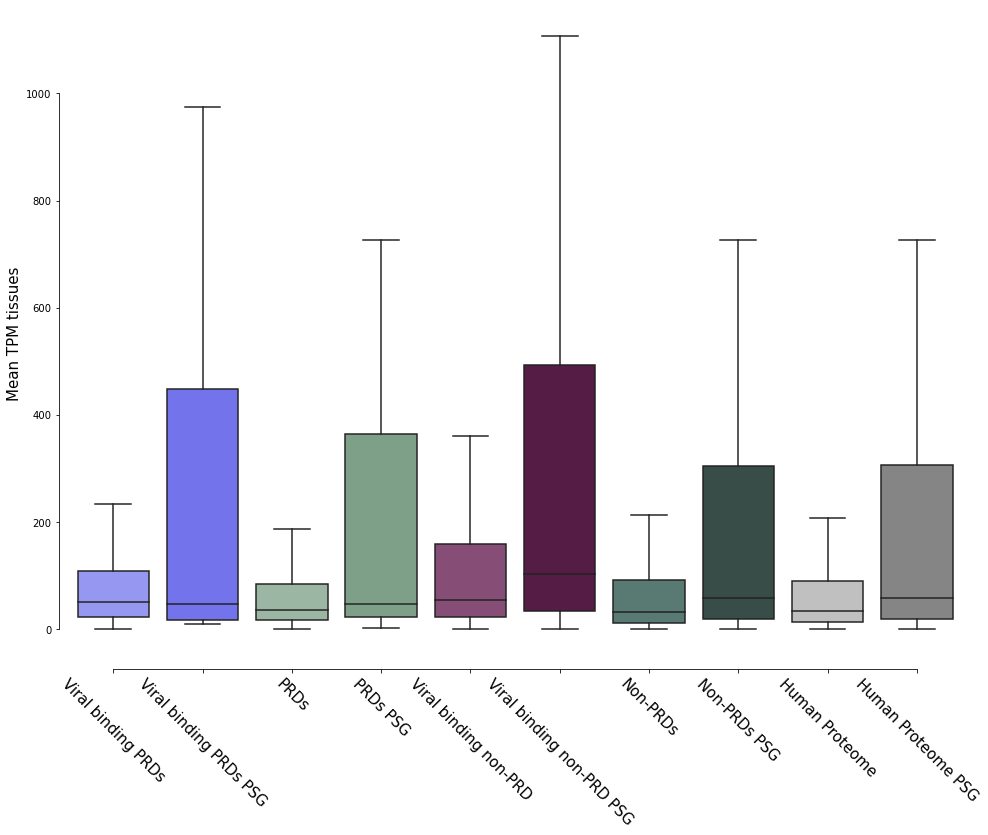

In [120]:
# final meta_data
# with no uniprot

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'
Viral_non_EBD_interactions

EBD_domain = df[df['EBD_domain']==1]['Percentage_TPM_tissues'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain

non_EBD_domain = df[df['EBD_domain']==0]['Percentage_TPM_tissues'].to_frame()
non_EBD_domain['type'] = 'Non_EBD_domain'
non_EBD_domain

proteome =  df['Percentage_TPM_tissues'].to_frame()
proteome['type'] = 'Proteome'
proteome

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Percentage_TPM_tissues'].to_frame() 
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'

EBD_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
EBD_PSG['type'] = 'EBD_PSG'

Non_EBD_PSG = df[(df['EBD_domain']==0)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Non_EBD_PSG['type'] = 'Non_EBD_PSG'

proteome_PSG =  df[df['PSG_dn_ds']==1]['Percentage_TPM_tissues'].to_frame()
proteome_PSG['type'] = 'Proteome_PSG'

Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['PSG_dn_ds']==1))]['Percentage_TPM_tissues'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'



df_merege =  bind_virus_elm_hvidb_only_EBD.append([
        
                                                                              bind_virus_elm_hvidb_only_EBD_PSG,
                                                                              EBD_domain,
                                                                              EBD_PSG,
                                                                             Viral_non_EBD_interactions,
                                                                            Viral_non_EBD_interactions_PSG,
                                                                             non_EBD_domain,
                                                                              Non_EBD_PSG,
                                                                              proteome,
                                                                             proteome_PSG],ignore_index=True)

list_colors =['#8688ff','#5f61ff','#98baa2','#79a686','#8f447a','#5e1349','#547f76','#35504a','#C0C0C0','#858585']

df_merege = df_merege.dropna()
df_merege

f = plt.figure(figsize=[16,12])
ax = sns.boxplot(x="type", y="Percentage_TPM_tissues",data=df_merege,showfliers = False,palette=list_colors)
#ax.set(ylim=(0,100))
plt.ylabel('Mean TPM tissues', fontsize = 15)
plt.xlabel('')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels([
                    'Viral binding PRDs','Viral binding PRDs PSG',
                    'PRDs','PRDs PSG',
                    'Viral binding non-PRD','Viral binding non-PRD PSG',
                    'Non-PRDs','Non-PRDs PSG',
                    'Human Proteome','Human Proteome PSG'],rotation = -45, size =15)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\tpm_psg_max_minus_median.pdf',transparent=True)


In [121]:
a = bind_virus_elm_hvidb_only_EBD['Percentage_TPM_tissues'].median()
print('Viral binding PRDs',a)

a = bind_virus_elm_hvidb_only_EBD_PSG['Percentage_TPM_tissues'].median()
print('Viral binding PRDs PSG',a)

a = EBD_domain['Percentage_TPM_tissues'].median()
print('PRDs',a)

a = EBD_PSG['Percentage_TPM_tissues'].median()
print('PRDs PSG',a)


a = Viral_non_EBD_interactions['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD',a)

a = Viral_non_EBD_interactions_PSG['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD PSG',a)

a = non_EBD_domain['Percentage_TPM_tissues'].median()
print('Non-PRDs',a)

a = Non_EBD_PSG['Percentage_TPM_tissues'].median()
print('Non-PRDs PSG',a)

a = proteome['Percentage_TPM_tissues'].median()
print('Human Proteome',a)

a = proteome_PSG['Percentage_TPM_tissues'].median()
print('Human Proteome PSG',a)

Viral binding PRDs 50.6
Viral binding PRDs PSG 46.8
PRDs 36.900000000000006
PRDs PSG 47.3
Viral binding non-PRD 54.0
Viral binding non-PRD PSG 103.95
Non-PRDs 33.1
Non-PRDs PSG 58.7
Human Proteome 33.7
Human Proteome PSG 58.400000000000006


In [112]:
# max minus mean

In [122]:
df= pd.read_csv('25_Final_union_all_only_uniprot_ID_no_dup_new_update.txt',index_col = 'Gene')

df_max_minus_mean_tpm = pd.read_csv(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\15_expressed_tissues\rna_tissue_hpa_max_minus_mean.txt',index_col='gene_id')

df.update(df_max_minus_mean_tpm)

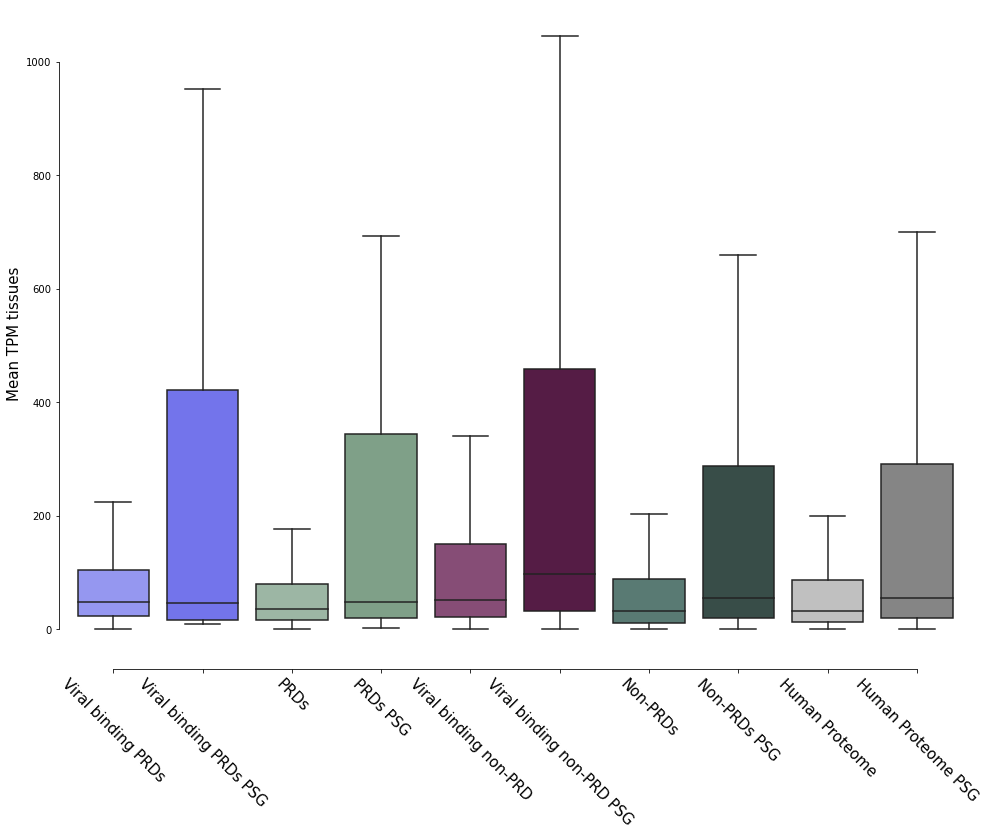

In [123]:
# final meta_data
# with no uniprot

Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb = df[df['Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb['type'] = 'Viral_binding_EBD_experimental_pdb_Domain_Motif'
Viral_binding_EBD_experimental_pdb_Domain_Motif_elm_hvidb

Inferred_interface_Human_Domain_Motif_elm_hvidb= df[df['Inferred_interface_Human_Domain_Motif_elm_hvidb']==1]['Percentage_TPM_tissues'].to_frame() 
Inferred_interface_Human_Domain_Motif_elm_hvidb['type'] = 'EBD_not_bind_experimental_Inferred_Domain_Motif'
Inferred_interface_Human_Domain_Motif_elm_hvidb

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60 = df[df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif'
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60

Viral_non_EBD_interactions = df[df['Viral_non_EBD_interactions']==1]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions['type'] = 'Viral_non_EBD_interactions'
Viral_non_EBD_interactions

EBD_domain = df[df['EBD_domain']==1]['Percentage_TPM_tissues'].to_frame()
EBD_domain['type'] = 'EBD_domain'
EBD_domain

non_EBD_domain = df[df['EBD_domain']==0]['Percentage_TPM_tissues'].to_frame()
non_EBD_domain['type'] = 'Non_EBD_domain'
non_EBD_domain

proteome =  df['Percentage_TPM_tissues'].to_frame()
proteome['type'] = 'Proteome'
proteome

bind_virus_elm_hvidb_only_EBD = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&(df['EBD_domain']==1)]['Percentage_TPM_tissues'].to_frame() 
bind_virus_elm_hvidb_only_EBD['type'] = 'bind_virus_elm_hvidb_only_EBD'

EBD_PSG = df[(df['EBD_domain']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
EBD_PSG['type'] = 'EBD_PSG'

Non_EBD_PSG = df[(df['EBD_domain']==0)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Non_EBD_PSG['type'] = 'Non_EBD_PSG'

proteome_PSG =  df[df['PSG_dn_ds']==1]['Percentage_TPM_tissues'].to_frame()
proteome_PSG['type'] = 'Proteome_PSG'

Viral_non_EBD_interactions_PSG = df[(df['Viral_non_EBD_interactions']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame()
Viral_non_EBD_interactions_PSG['type'] = 'Viral_non_EBD_interactions_PSG'

Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG = df[(df['Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60']==1)&(df['PSG_dn_ds']==1)]['Percentage_TPM_tissues'].to_frame() 
Hvidb_Human_bind_virus_PPI_data_domain_motif_similarity_above_60_PSG['type'] = 'Viral_binding_EBD_Inferred_Domain_Motif_PSG'


bind_virus_elm_hvidb_only_EBD_PSG = df[((df['Hvidb_Experimentally_verified_complex_structures']==1)|(df['Hvidb_Human_virus_PPI_data']==1)|(df['Bind_pathogen_elm']==1))&((df['EBD_domain']==1)&(df['PSG_dn_ds']==1))]['Percentage_TPM_tissues'].to_frame()
bind_virus_elm_hvidb_only_EBD_PSG['type'] = 'bind_virus_elm_hvidb_only_EBD_PSG'



df_merege =  bind_virus_elm_hvidb_only_EBD.append([
        
                                                                              bind_virus_elm_hvidb_only_EBD_PSG,
                                                                              EBD_domain,
                                                                              EBD_PSG,
                                                                             Viral_non_EBD_interactions,
                                                                            Viral_non_EBD_interactions_PSG,
                                                                             non_EBD_domain,
                                                                              Non_EBD_PSG,
                                                                              proteome,
                                                                             proteome_PSG],ignore_index=True)

list_colors =['#8688ff','#5f61ff','#98baa2','#79a686','#8f447a','#5e1349','#547f76','#35504a','#C0C0C0','#858585']

df_merege = df_merege.dropna()
df_merege

f = plt.figure(figsize=[16,12])
ax = sns.boxplot(x="type", y="Percentage_TPM_tissues",data=df_merege,showfliers = False,palette=list_colors)
#ax.set(ylim=(0,100))
plt.ylabel('Mean TPM tissues', fontsize = 15)
plt.xlabel('')
sns.despine(offset=10,trim=True,fig=f,ax=ax)
ax.set_xticklabels([
                    'Viral binding PRDs','Viral binding PRDs PSG',
                    'PRDs','PRDs PSG',
                    'Viral binding non-PRD','Viral binding non-PRD PSG',
                    'Non-PRDs','Non-PRDs PSG',
                    'Human Proteome','Human Proteome PSG'],rotation = -45, size =15)

ax.figure.savefig(r'C:\Users\TzachiHNB2\Desktop\Master\HVIDB_9_5\18_Meta_tables\adobe_illustrator\tpm_psg_max_minus_mean.pdf',transparent=True)


In [124]:
a = bind_virus_elm_hvidb_only_EBD['Percentage_TPM_tissues'].median()
print('Viral binding PRDs',a)

a = bind_virus_elm_hvidb_only_EBD_PSG['Percentage_TPM_tissues'].median()
print('Viral binding PRDs PSG',a)

a = EBD_domain['Percentage_TPM_tissues'].median()
print('PRDs',a)

a = EBD_PSG['Percentage_TPM_tissues'].median()
print('PRDs PSG',a)


a = Viral_non_EBD_interactions['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD',a)

a = Viral_non_EBD_interactions_PSG['Percentage_TPM_tissues'].median()
print('Viral binding non-PRD PSG',a)

a = non_EBD_domain['Percentage_TPM_tissues'].median()
print('Non-PRDs',a)

a = Non_EBD_PSG['Percentage_TPM_tissues'].median()
print('Non-PRDs PSG',a)

a = proteome['Percentage_TPM_tissues'].median()
print('Human Proteome',a)

a = proteome_PSG['Percentage_TPM_tissues'].median()
print('Human Proteome PSG',a)

Viral binding PRDs 48.90581395348837
Viral binding PRDs PSG 46.8953488372093
PRDs 35.711627906976744
PRDs PSG 48.64883720930232
Viral binding non-PRD 51.74767441860465
Viral binding non-PRD PSG 96.89883720930233
Non-PRDs 31.587209302325576
Non-PRDs PSG 55.73953488372093
Human Proteome 32.27209302325581
Human Proteome PSG 55.682558139534876
